# The file for experiments of comparing generalizability of Gen/Ext Models

### Import and Set Figure Param

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import importlib

import utils.analysis_utils as analysis_utils
import utils.hallucination_utils as hallucination_utils
import utils.plotting_utils as plotting_utils
from utils.metric_utils import f1_score, exact_match_score

In [5]:
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 15}
mpl.rcParams['figure.dpi'] = 900
mpl.rc('font', **font)
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 

### Log the models' performance onto a single CSV file

In [9]:
importlib.reload(analysis_utils)

<module 'analysis_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post_eval_analysis/analysis_utils.py'>

In [6]:
analysis_utils.produce_aggregate_csv(base_dataset='squad')

### Boostrap to compute the confidence intervals on evluation.

In [13]:
# This is just an example. The model setup should be the exact same name as
#    its directory appears in trained_models
dataset = 'bioasq'
model_setup = 'roberta-base-1e-5-12345'
result = analysis_utils.bootstrap_eval(dataset, model_setup, base_dataset='squad')

Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 609.02it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


BootstrapResult(confidence_interval=ConfidenceInterval(low=60.16823066463385, high=64.55123652924195), standard_error=1.1134025249997437)
Mid value is  62.3597335969379


### Compute and Plot the Prediction Agreement

In [6]:
dataset = 'TriviaQA'
metric_name = 'F1'
metric_fn = f1_score if metric_name == 'F1' else exact_match_score

model_list = ['bert-base-uncased', 'roberta-base', 'facebook/bart-base', 'google/t5-v1_1-base']
conf_matrix, full_model_list = analysis_utils.prediction_agreement(dataset, model_list, metric_fn, base_dataset='TriviaQA')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


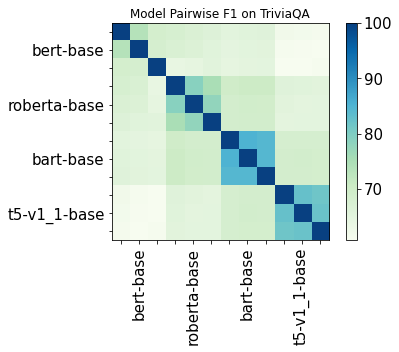

In [7]:
# Create a list for displaying, instead of the raw model names from model_list
display_model_list = ['bert-base', 'roberta-base', 'bart-base', 't5-v1_1-base']
plotting_utils.plot_pred_agreement(full_model_list, display_model_list, metric_name, dataset, conf_matrix)

In [16]:
importlib.reload(analysis_utils)

<module 'analysis_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post-eval-analysis/analysis_utils.py'>

In [17]:
metric_name = 'F1'
metric_fn = f1_score if metric_name == 'F1' else exact_match_score
conf_matrix, full_model_list = analysis_utils.prediction_agreement_common_mistakes(dataset, model_list, metric_fn, base_dataset='squad')

Using custom data configuration default-eea83fcb5528ee90
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 659.38it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-709ff7dc4a2d7634.arrow


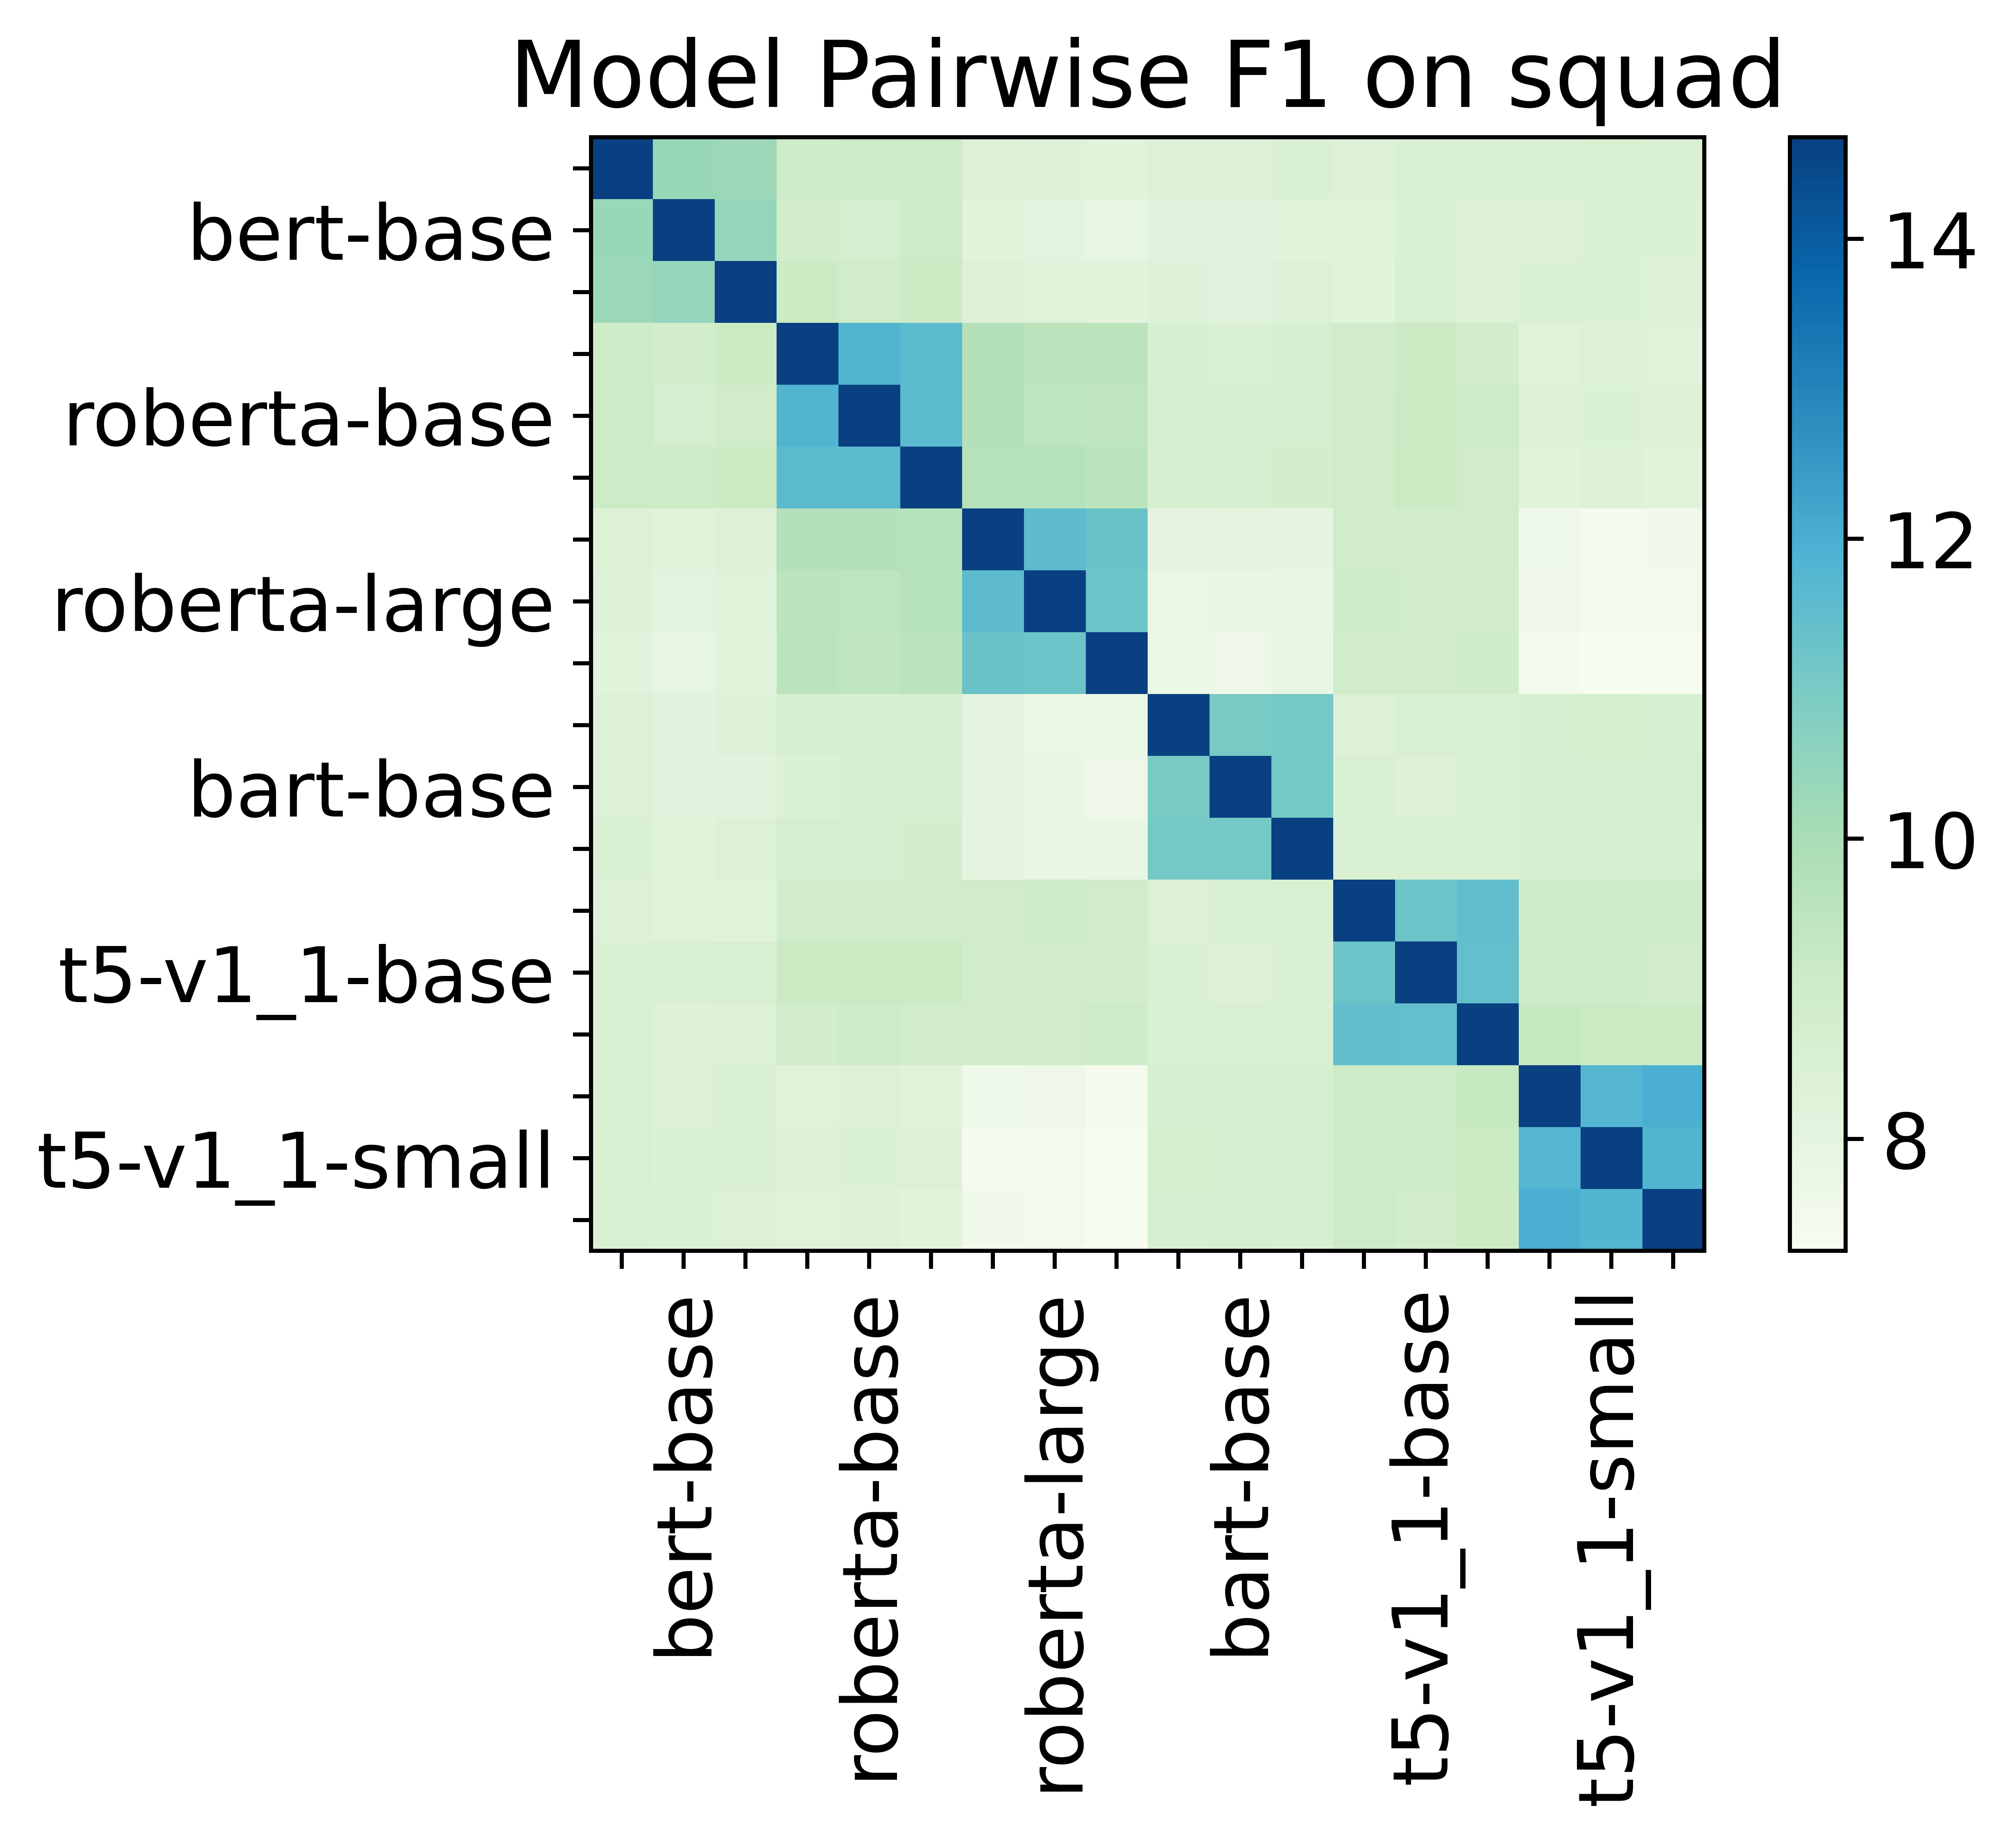

In [18]:
plotting_utils.plot_pred_agreement(full_model_list, display_model_list, metric_name, dataset, conf_matrix)

#### Prediction agreement is dominated by good-performing models, let's look at errors instead

In [10]:
importlib.reload(analysis_utils)
importlib.reload(plotting_utils)

<module 'plotting_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post-eval-analysis/plotting_utils.py'>

In [4]:
group1 = ['bert-base-uncased', 'roberta-base']
group2 =['facebook/bart-base', 'google/t5-v1_1-base']
model_list = ['bert-base-uncased', 'roberta-base', 'facebook/bart-base', 'google/t5-v1_1-base']
dataset ='SearchQA'

thresholds = [round(0.1 * i, 1) for i in range(5, 10)]
number_of_group1_mistaken_instances = []
number_of_group2_mistaken_instances = []
## Output commom mistakes of gen/ext to separate files
for threshold in thresholds:
    group1_mistaken_samples, group2_mistaken_samples = analysis_utils.common_mistakes_by_groups(dataset, model_list, group1, group2, metric_fn=f1_score, threshold=threshold, base_dataset='squad')
    number_of_group1_mistaken_instances.append(len(group1_mistaken_samples))
    number_of_group2_mistaken_instances.append(len(group2_mistaken_samples))

Using custom data configuration default-0b1ce7f139804bd3
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-0b1ce7f139804bd3/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 594.18it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-0b1ce7f139804bd3/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-ae8e13a173d16a8a.arrow


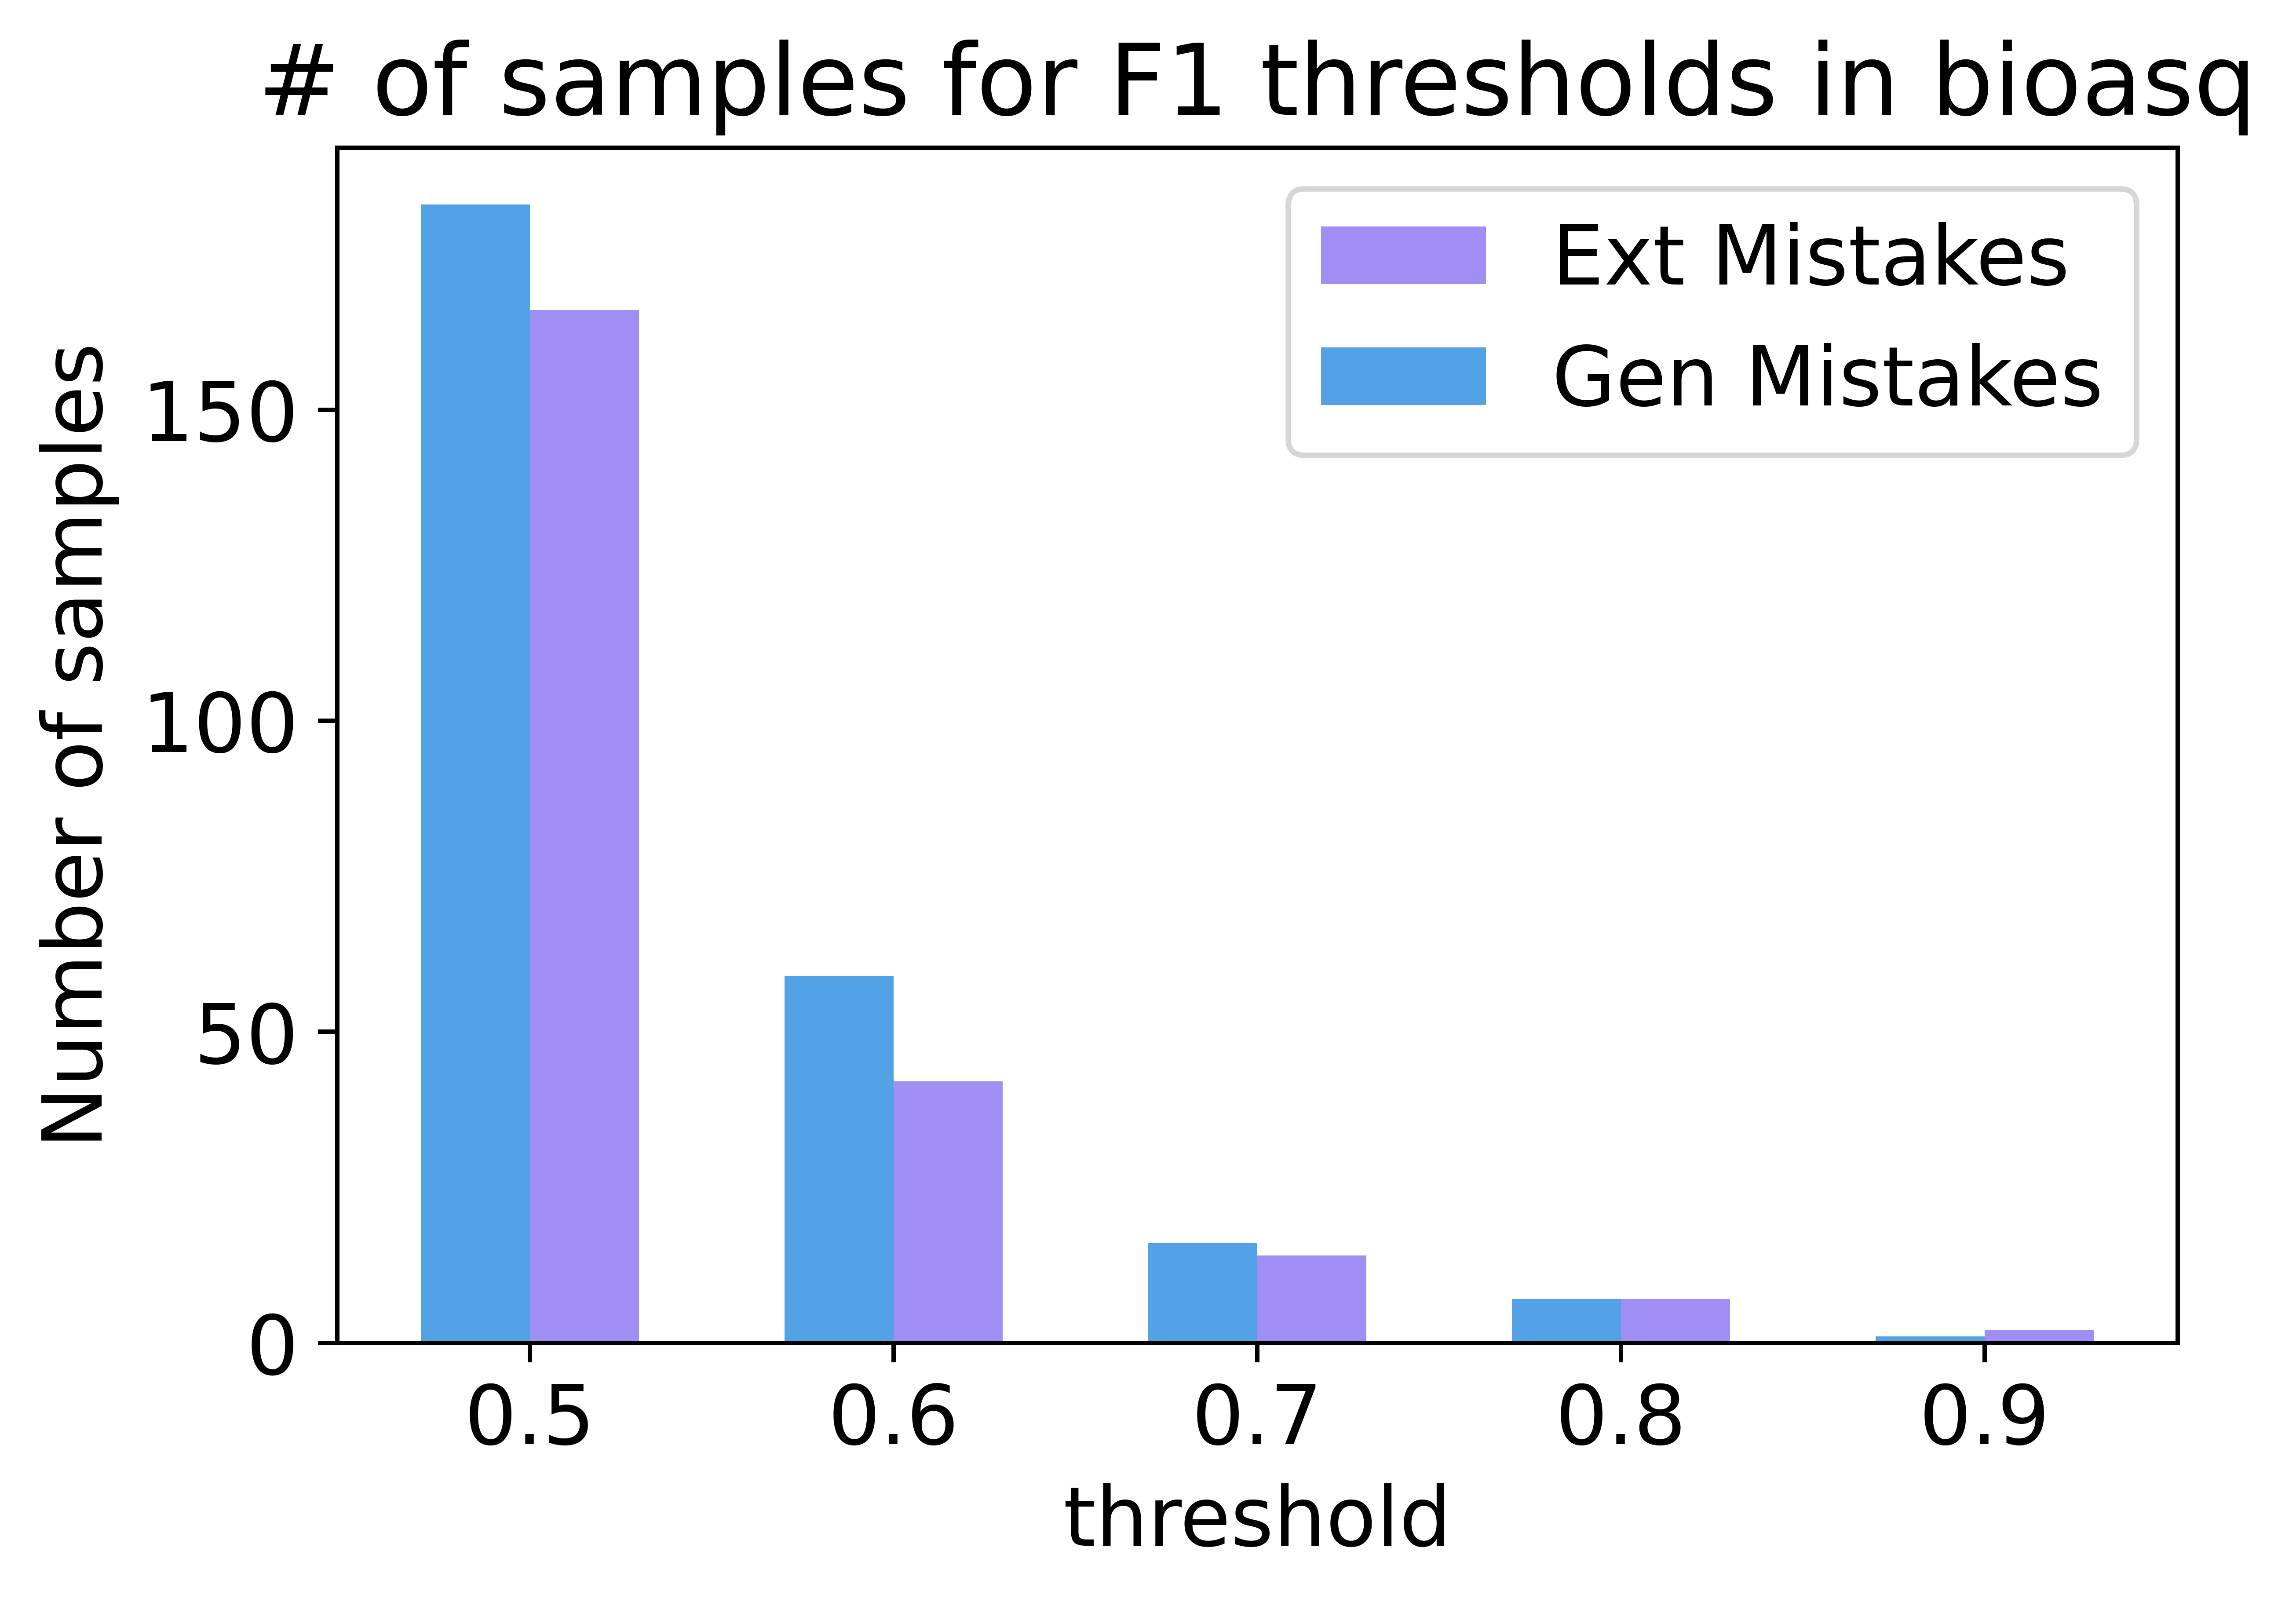

In [21]:
legend_labels = ['Ext Mistakes', 'Gen Mistakes']
plotting_utils.bar_plot([number_of_group1_mistaken_instances, number_of_group2_mistaken_instances], thresholds, legend_labels, title='# of samples for F1 thresholds in ' + dataset)

In [3]:
group1 = ['bert-base-uncased', 'roberta-base']
group2 =['facebook/bart-base', 'google/t5-v1_1-base']
model_list = ['bert-base-uncased', 'roberta-base', 'facebook/bart-base', 'google/t5-v1_1-base']
dataset ='bioasq'
# Metric name can either be 'F1' or 'EM'
metric_name = 'F1'
metric_fn = f1_score if metric_name == 'F1' else exact_match_score

ext_perf, gen_perf = analysis_utils.performance_for_each_instance(dataset, model_list, group1, group2, metric_fn, base_dataset='TriviaQA')

Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 516.03it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


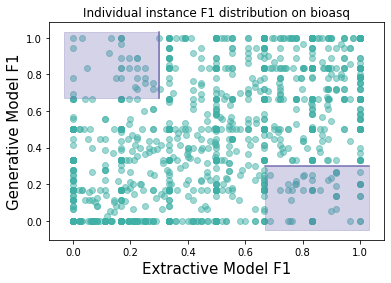

In [11]:
# Plot the purple area prediction agreement
alpha=0.3
plt.scatter(ext_perf, gen_perf, c='#40B0A6', alpha=0.5)
plt.ylabel('Generative Model ' + metric_name, fontsize=15)
plt.xlabel('Extractive Model ' + metric_name, fontsize=15)
plt.plot([1-alpha-0.03, 1.03], [alpha, alpha], c='#7570B3')
plt.plot([alpha, alpha], [1-alpha-0.03, 1.03], c='#7570B3')
plt.fill_between([1-alpha-0.03, 1.03], [-0.05, -0.05], [alpha, alpha], alpha=0.3, color='#7570B3')
plt.fill_between([-0.03, alpha], [1-alpha-0.03, 1-alpha-0.03], [1.03, 1.03], alpha=0.3, color='#7570B3')
plt.title('Individual instance ' + metric_name + ' distribution on ' + dataset)
plt.show()

### Compute and plot the model performane with respect to the sequence length

In [24]:
importlib.reload(analysis_utils)

<module 'analysis_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post-eval-analysis/analysis_utils.py'>

In [18]:
def avg_across_setup(perf_dict, model_list, setup_model_list):
    # Averaged across different setup (lr, random seed) for each architecture
    averaged_dict = {}
    total_setup = {model : 0 for model in model_list}
    for model_setup in setup_model_list:
        for model in model_list:
            if model in model_setup:
                if model not in averaged_dict:
                    averaged_dict[model] = np.array(perf_dict[model_setup])
                else:
                    averaged_dict[model] += np.array(perf_dict[model_setup])
                total_setup[model] += 1
    
    # Compute average
    for model in averaged_dict:
        averaged_dict[model] /= total_setup[model]
    return averaged_dict

In [21]:
model_list = ['bert-base-uncased',
            'roberta-base',
            'roberta-large',
            'facebook/bart-base',
            'google/t5-v1_1-base',
            # 'google/t5-v1_1-small'
            ]
display_model_list = ['bert-base-uncased',
            'roberta-base',
            'roberta-large',
            'bart-base',
            't5-v1_1-base',
            # 't5-v1_1-small'
            ]
dataset='bioasq'


ans_perfs, ans_lens, ans_len_counts, full_model_list = analysis_utils.perf_wrt_seq_len(dataset, model_list, num_buckets=3, metric_fn=f1_score, sequence_to_look='answers')
ans_perfs = avg_across_setup(ans_perfs, display_model_list, full_model_list)
print(ans_perfs)
print(ans_lens)
print(ans_len_counts[1:])

que_perfs, que_lens, que_len_counts, full_model_list = analysis_utils.perf_wrt_seq_len(dataset, model_list, num_buckets=6, metric_fn=f1_score, sequence_to_look='question')
que_perfs = avg_across_setup(que_perfs, display_model_list, full_model_list)
print(que_perfs)
print(que_lens)
print(que_len_counts[1:])

con_perfs, con_lens, con_len_counts, full_model_list = analysis_utils.perf_wrt_seq_len(dataset, model_list, num_buckets=8, metric_fn=f1_score, sequence_to_look='context')
con_perfs = avg_across_setup(con_perfs, display_model_list, full_model_list)
print(con_perfs)
print(con_lens)
print(con_len_counts[1:])

Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 636.27it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bert-base-uncased': array([53.73768431, 56.23916071, 56.68330878, 51.29273213]), 'roberta-base': array([62.37065111, 60.43132614, 68.72950352, 55.95555559]), 'roberta-large': array([64.89631218, 63.25281869, 70.42812801, 65.5681698 ]), 'bart-base': array([55.33782129, 54.28489843, 55.74280754, 39.91237534]), 't5-v1_1-base': array([62.65116955, 60.17927775, 62.01016865, 51.05743206])}
[1.0, 2.0, 3.0, 38.0]
[929, 309, 192, 74]


Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 597.48it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bert-base-uncased': array([49.72607229, 53.15721941, 60.62520695, 57.26787291, 55.2983389 ,
       63.64919032, 50.63150621]), 'roberta-base': array([58.97459176, 64.96707662, 69.78506062, 66.51519166, 60.42829945,
       62.95334295, 56.37753193]), 'roberta-large': array([62.70358376, 64.36328917, 74.13713403, 67.54354354, 59.9303951 ,
       69.80439314, 60.64349605]), 'bart-base': array([51.56501657, 53.19362854, 56.60380735, 59.51751752, 52.3009381 ,
       59.95189995, 53.1665865 ]), 't5-v1_1-base': array([58.13419413, 50.86604587, 63.59439062, 69.2012012 , 65.05184078,
       64.53743787, 63.68686869])}
[7.0, 8.0, 9.0, 10.0, 11.0, 14.0, 27.0]
[437, 170, 252, 185, 163, 99, 198]


Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 752.34it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bert-base-uncased': array([63.52599484, 58.8978139 , 58.65316214, 59.34077119, 53.73746487,
       45.59165645, 50.15557105, 49.40976967, 48.98948319]), 'roberta-base': array([66.62379139, 62.13385895, 67.98679241, 65.19512251, 64.64316642,
       57.35990869, 60.36849981, 57.38512478, 59.6723595 ]), 'roberta-large': array([67.09151847, 65.17596843, 72.81797263, 69.94187564, 65.67488408,
       58.63313739, 62.51255946, 61.85914598, 63.56797792]), 'bart-base': array([61.3583539 , 58.92192252, 58.4113963 , 58.90910047, 49.17704914,
       51.19269447, 49.32147756, 49.18405378, 51.37270367]), 't5-v1_1-base': array([69.06936307, 61.90983547, 64.67874006, 63.01517222, 62.5114422 ,
       56.8162962 , 57.22516167, 57.46679247, 59.23592625])}
[125.0, 160.0, 189.0, 201.82142857142856, 219.0, 239.0, 254.0, 286.0, 639.0]
[189, 189, 169, 151, 163, 161, 162, 159, 161]


<Figure size 432x288 with 0 Axes>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


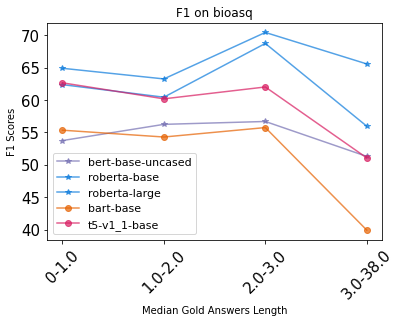

<Figure size 432x288 with 0 Axes>

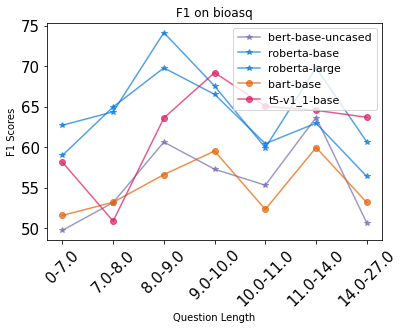

<Figure size 432x288 with 0 Axes>

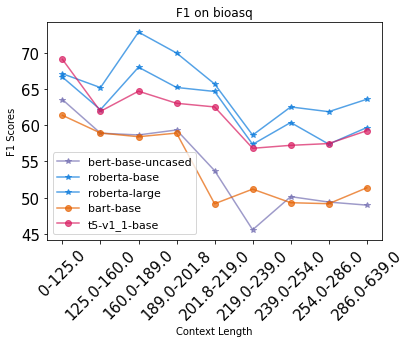

In [22]:
# Lengths are by space separated tokens
plotting_utils.plot_perf_wrt_seq(ans_perfs, ans_lens, 'Median Gold Answers Length', display_model_list, 'F1', dataset=dataset)
plotting_utils.plot_perf_wrt_seq(que_perfs, que_lens, 'Question Length', display_model_list, 'F1', dataset=dataset)
plotting_utils.plot_perf_wrt_seq(con_perfs, con_lens, 'Context Length', display_model_list, 'F1', dataset=dataset)

### Compute and plot domain v.s. hallucination rate for each generative model

In [23]:
importlib.reload(hallucination_utils)
importlib.reload(plotting_utils)

<module 'plotting_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post_eval_analysis/plotting_utils.py'>

In [2]:
# Compute the hallucination rate for each domain
model_list = ['facebook/bart-base', 'facebook/bart-base-tokenizer', 'google/t5-v1_1-base']
metric_name = 'F1'
domain_v_hallu, domain_v_perf, datasets, full_model_list = hallucination_utils.domain_vs_hallucination(model_list, base_dataset='squad', metric_name=metric_name)

Using custom data configuration default-eea83fcb5528ee90
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 500.22it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-709ff7dc4a2d7634.arrow
Using custom data configuration default-5035765bd867d66f
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 645.08it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-068980baab229c05.arrow
Using custom data configuration default-0ad243

[[0.02950414 0.05982906 0.08211281 0.11831567 0.04033398 0.04986702
  0.03997335 0.06520293]
 [0.02731512 0.078585   0.07704892 0.10800942 0.03288375 0.04986702
  0.04197202 0.07984032]
 [0.00656705 0.03442545 0.05172951 0.10583039 0.01913937 0.00930851
  0.01732179 0.03592814]
 [0.00571048 0.0365622  0.0555469  0.11861013 0.02273603 0.01595745
  0.01665556 0.04191617]
 [0.00875607 0.02302944 0.02742287 0.03339223 0.01387283 0.00731383
  0.01798801 0.0332668 ]
 [0.00923194 0.02587844 0.05913057 0.05789164 0.02106615 0.0099734
  0.02931379 0.05455755]]


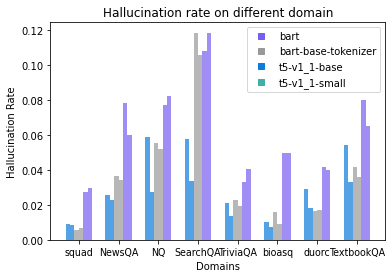

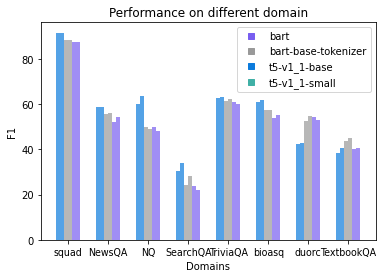

In [24]:
model_colors = {'bart': '#785EF0', 'bart-base-tokenizer': '#999999', 't5-v1_1-base': '#0C7BDC', 't5-v1_1-small': '#40B0A6'}
x = np.arange(len(datasets))  # the label locations
width = 0.66 / len(full_model_list)   # the width of the bars
fig, ax = plt.subplots()
print(domain_v_hallu)
datasets = list(map(lambda x: x.replace('NaturalQuestions', 'NQ'), datasets))
for model_idx, model in enumerate(full_model_list):
    for model_name in model_colors:
        if model_name in model:
            if 'tokenizer' in model:
                if 'tokenizer' in model_name:
                    color = model_colors[model_name]
            else:
                color = model_colors[model_name]
    rects = ax.bar(x + width * (len(full_model_list) / 2 - model_idx - 0.5), domain_v_hallu[model_idx], width, label=model, color=color, alpha=0.7)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f('s', model_colors[model]) for model in model_colors]
labels = [model for model in model_colors]

ax.set_ylabel('Hallucination Rate')
ax.set_xlabel('Domains')
ax.set_title('Hallucination rate on different domain')
ax.set_xticks(x, datasets, fontsize=9.5)
ax.legend(handles, labels)
plt.show()

x = np.arange(len(datasets))  # the label locations
width = 0.6 / len(full_model_list)   # the width of the bars
fig, ax = plt.subplots()
for model_idx, model in enumerate(full_model_list):
    for model_name in model_colors:
        if model_name in model:
            color = model_colors[model_name]
    rects = ax.bar(x + width * (len(full_model_list) / 2 - model_idx - 0.5), domain_v_perf[model_idx], width, label=model, color=color, alpha=0.7)

ax.set_ylabel(metric_name)
ax.set_xlabel('Domains')
ax.set_title('Performance on different domain')
ax.set_xticks(x, datasets, fontsize=9.5)
ax.legend(handles, labels)
plt.show()

### What will removing the hallucinated samples affect evaluation?

In [37]:
importlib.reload(hallucination_utils)

<module 'hallucination_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post-eval-analysis/hallucination_utils.py'>

In [38]:
model_list = ['facebook/bart-base', 'bert-base-uncased', 'roberta-base', 'google/t5-v1_1-base']
f1_change, f1_change_ratio, em_change, em_change_ratio, datasets, full_model_list = hallucination_utils.eval_without_hallucination(model_list, output_hallucinations=True, base_dataset='squad')

Using custom data configuration default-eea83fcb5528ee90
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 606.73it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-709ff7dc4a2d7634.arrow
Using custom data configuration default-5035765bd867d66f
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 672.92it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-068980baab229c05.arrow
Using custom data configuration default-0ad243

In [39]:
model_list = ['facebook/bart-base', 'bert-base-uncased', 'roberta-base', 'roberta-large', 'google/t5-v1_1-base', 'google/t5-v1_1-small']
f1_hallu, f1_unhallu, em_hallu, em_unhallu, full_model_list, datasets = hallucination_utils.eval_on_hallucination(model_list, output_hallucinations=True, base_dataset='squad')

Using custom data configuration default-eea83fcb5528ee90
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 566.42it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-eea83fcb5528ee90/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-709ff7dc4a2d7634.arrow
100%|██████████| 11/11 [00:00<00:00, 43.77ba/s]
Using custom data configuration default-5035765bd867d66f
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 572.68it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-068980baab229c05.arro

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


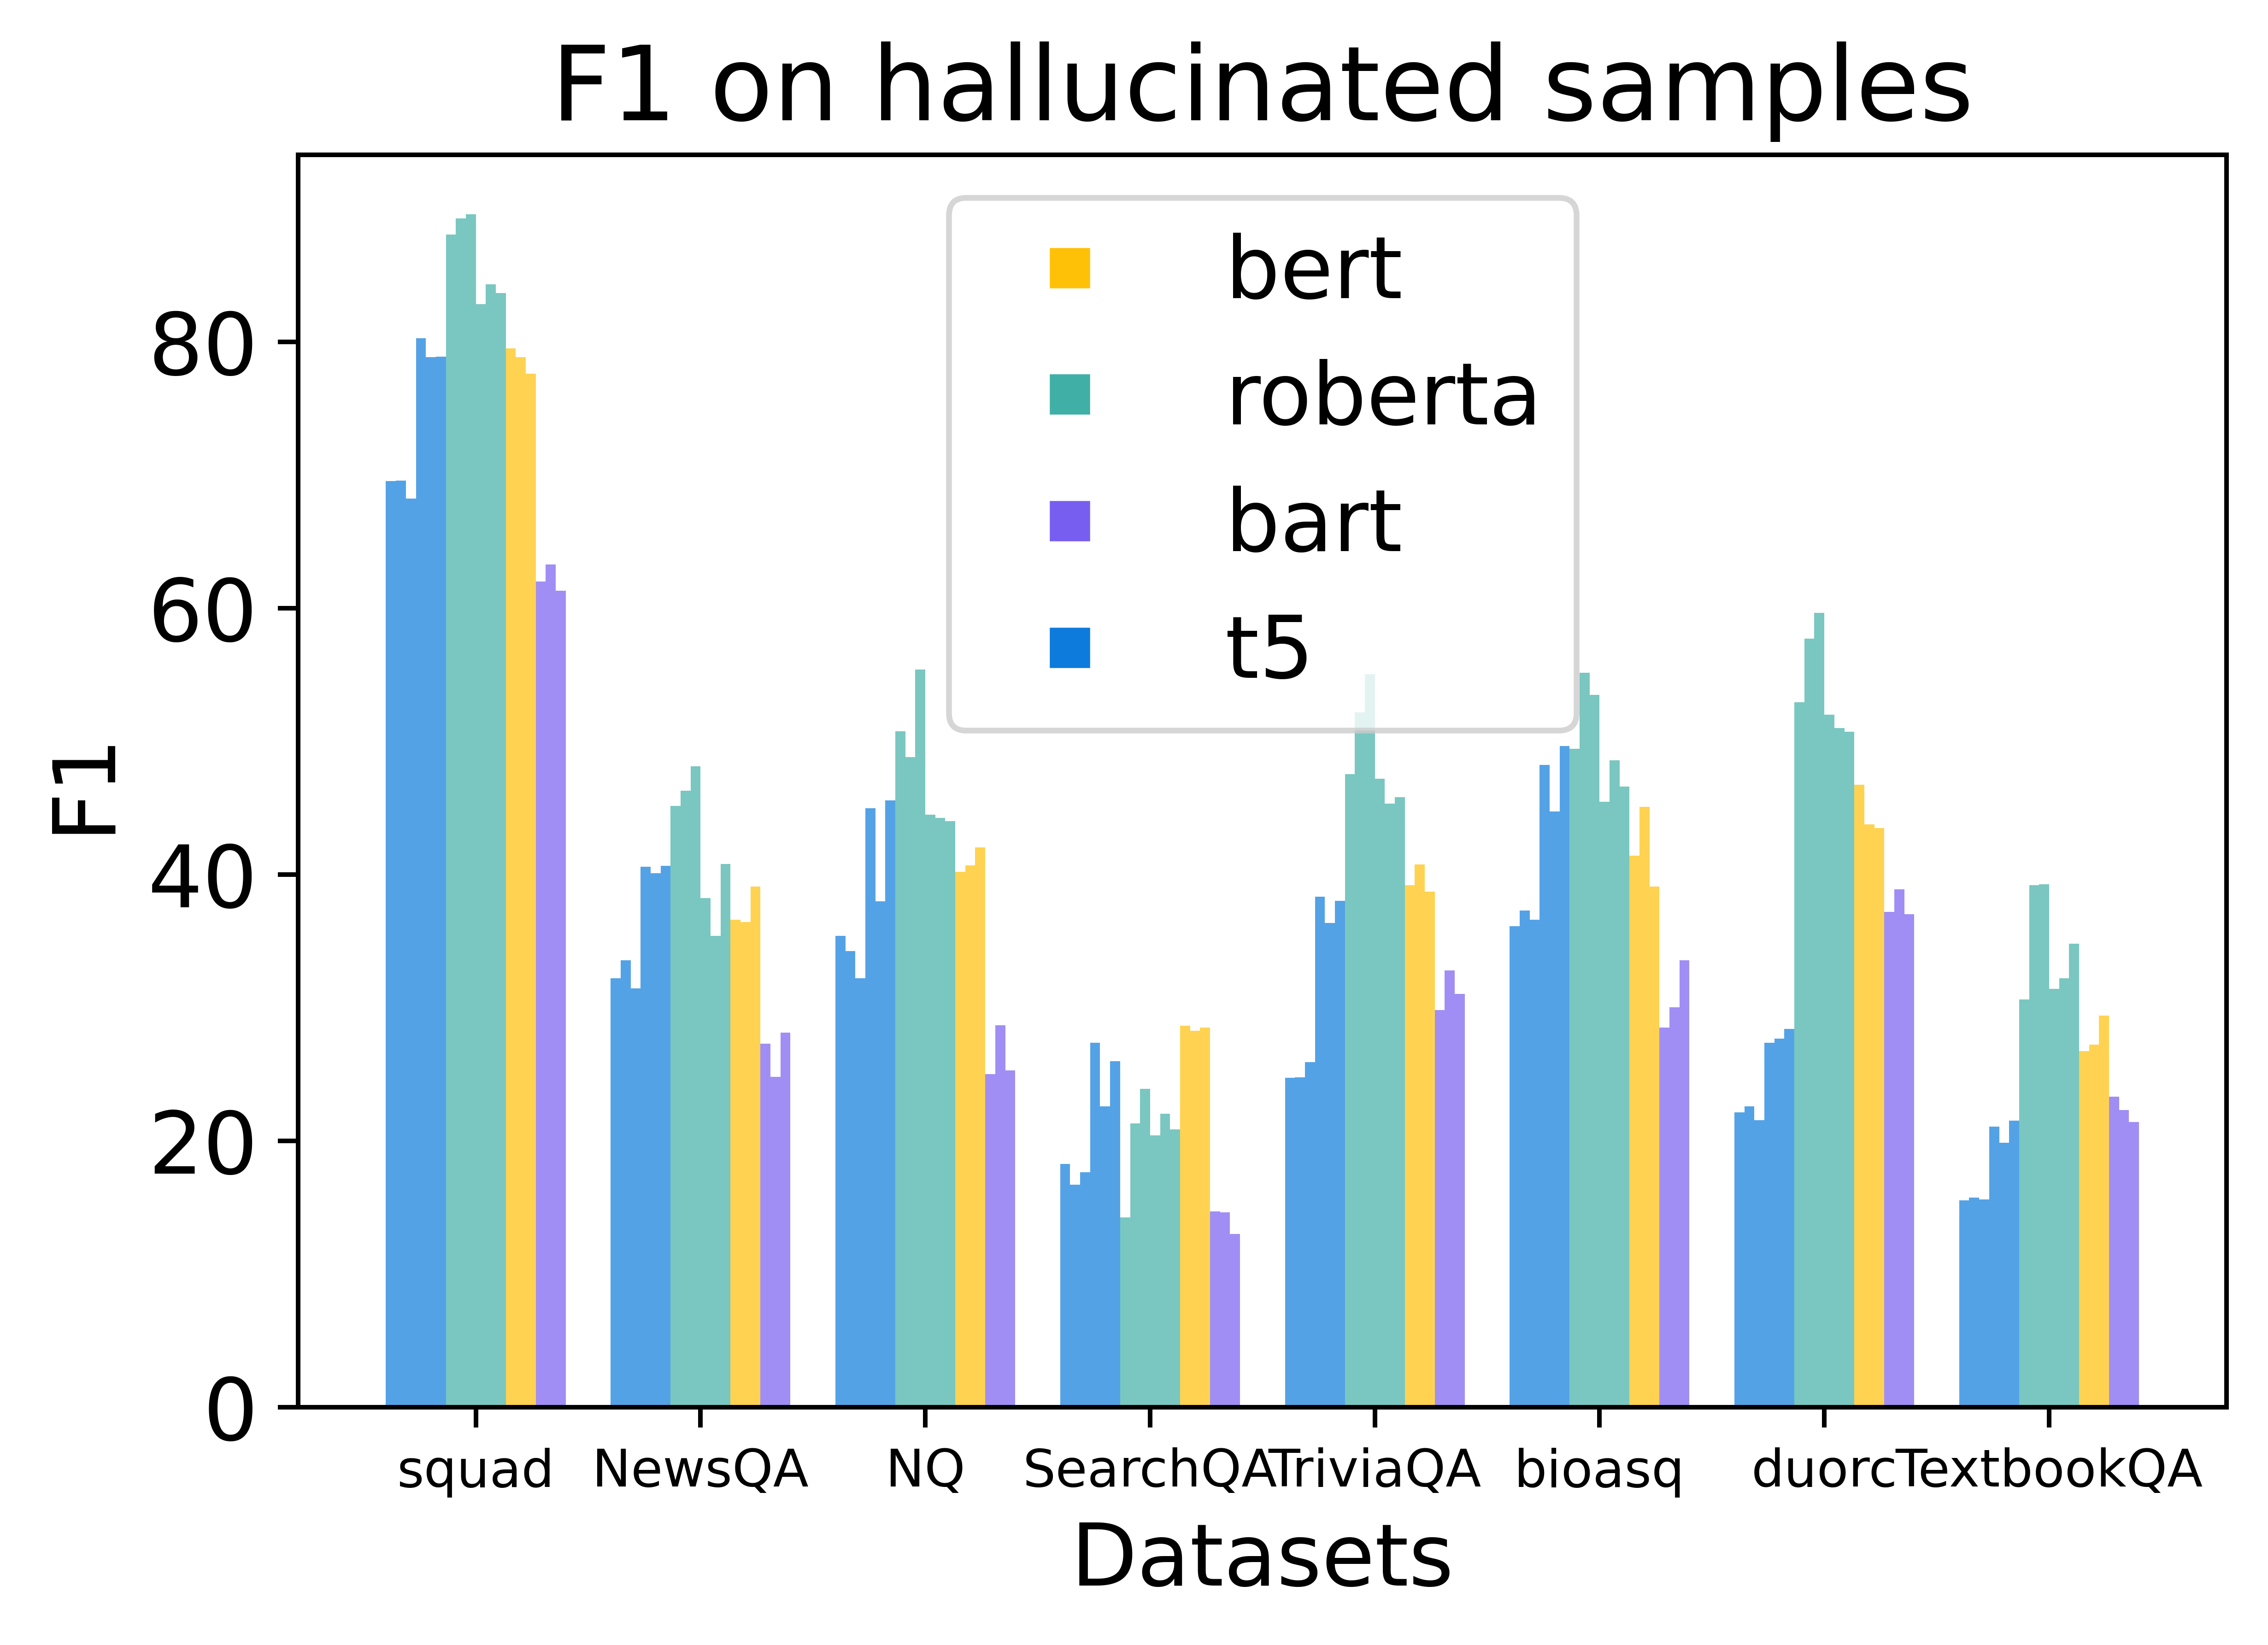

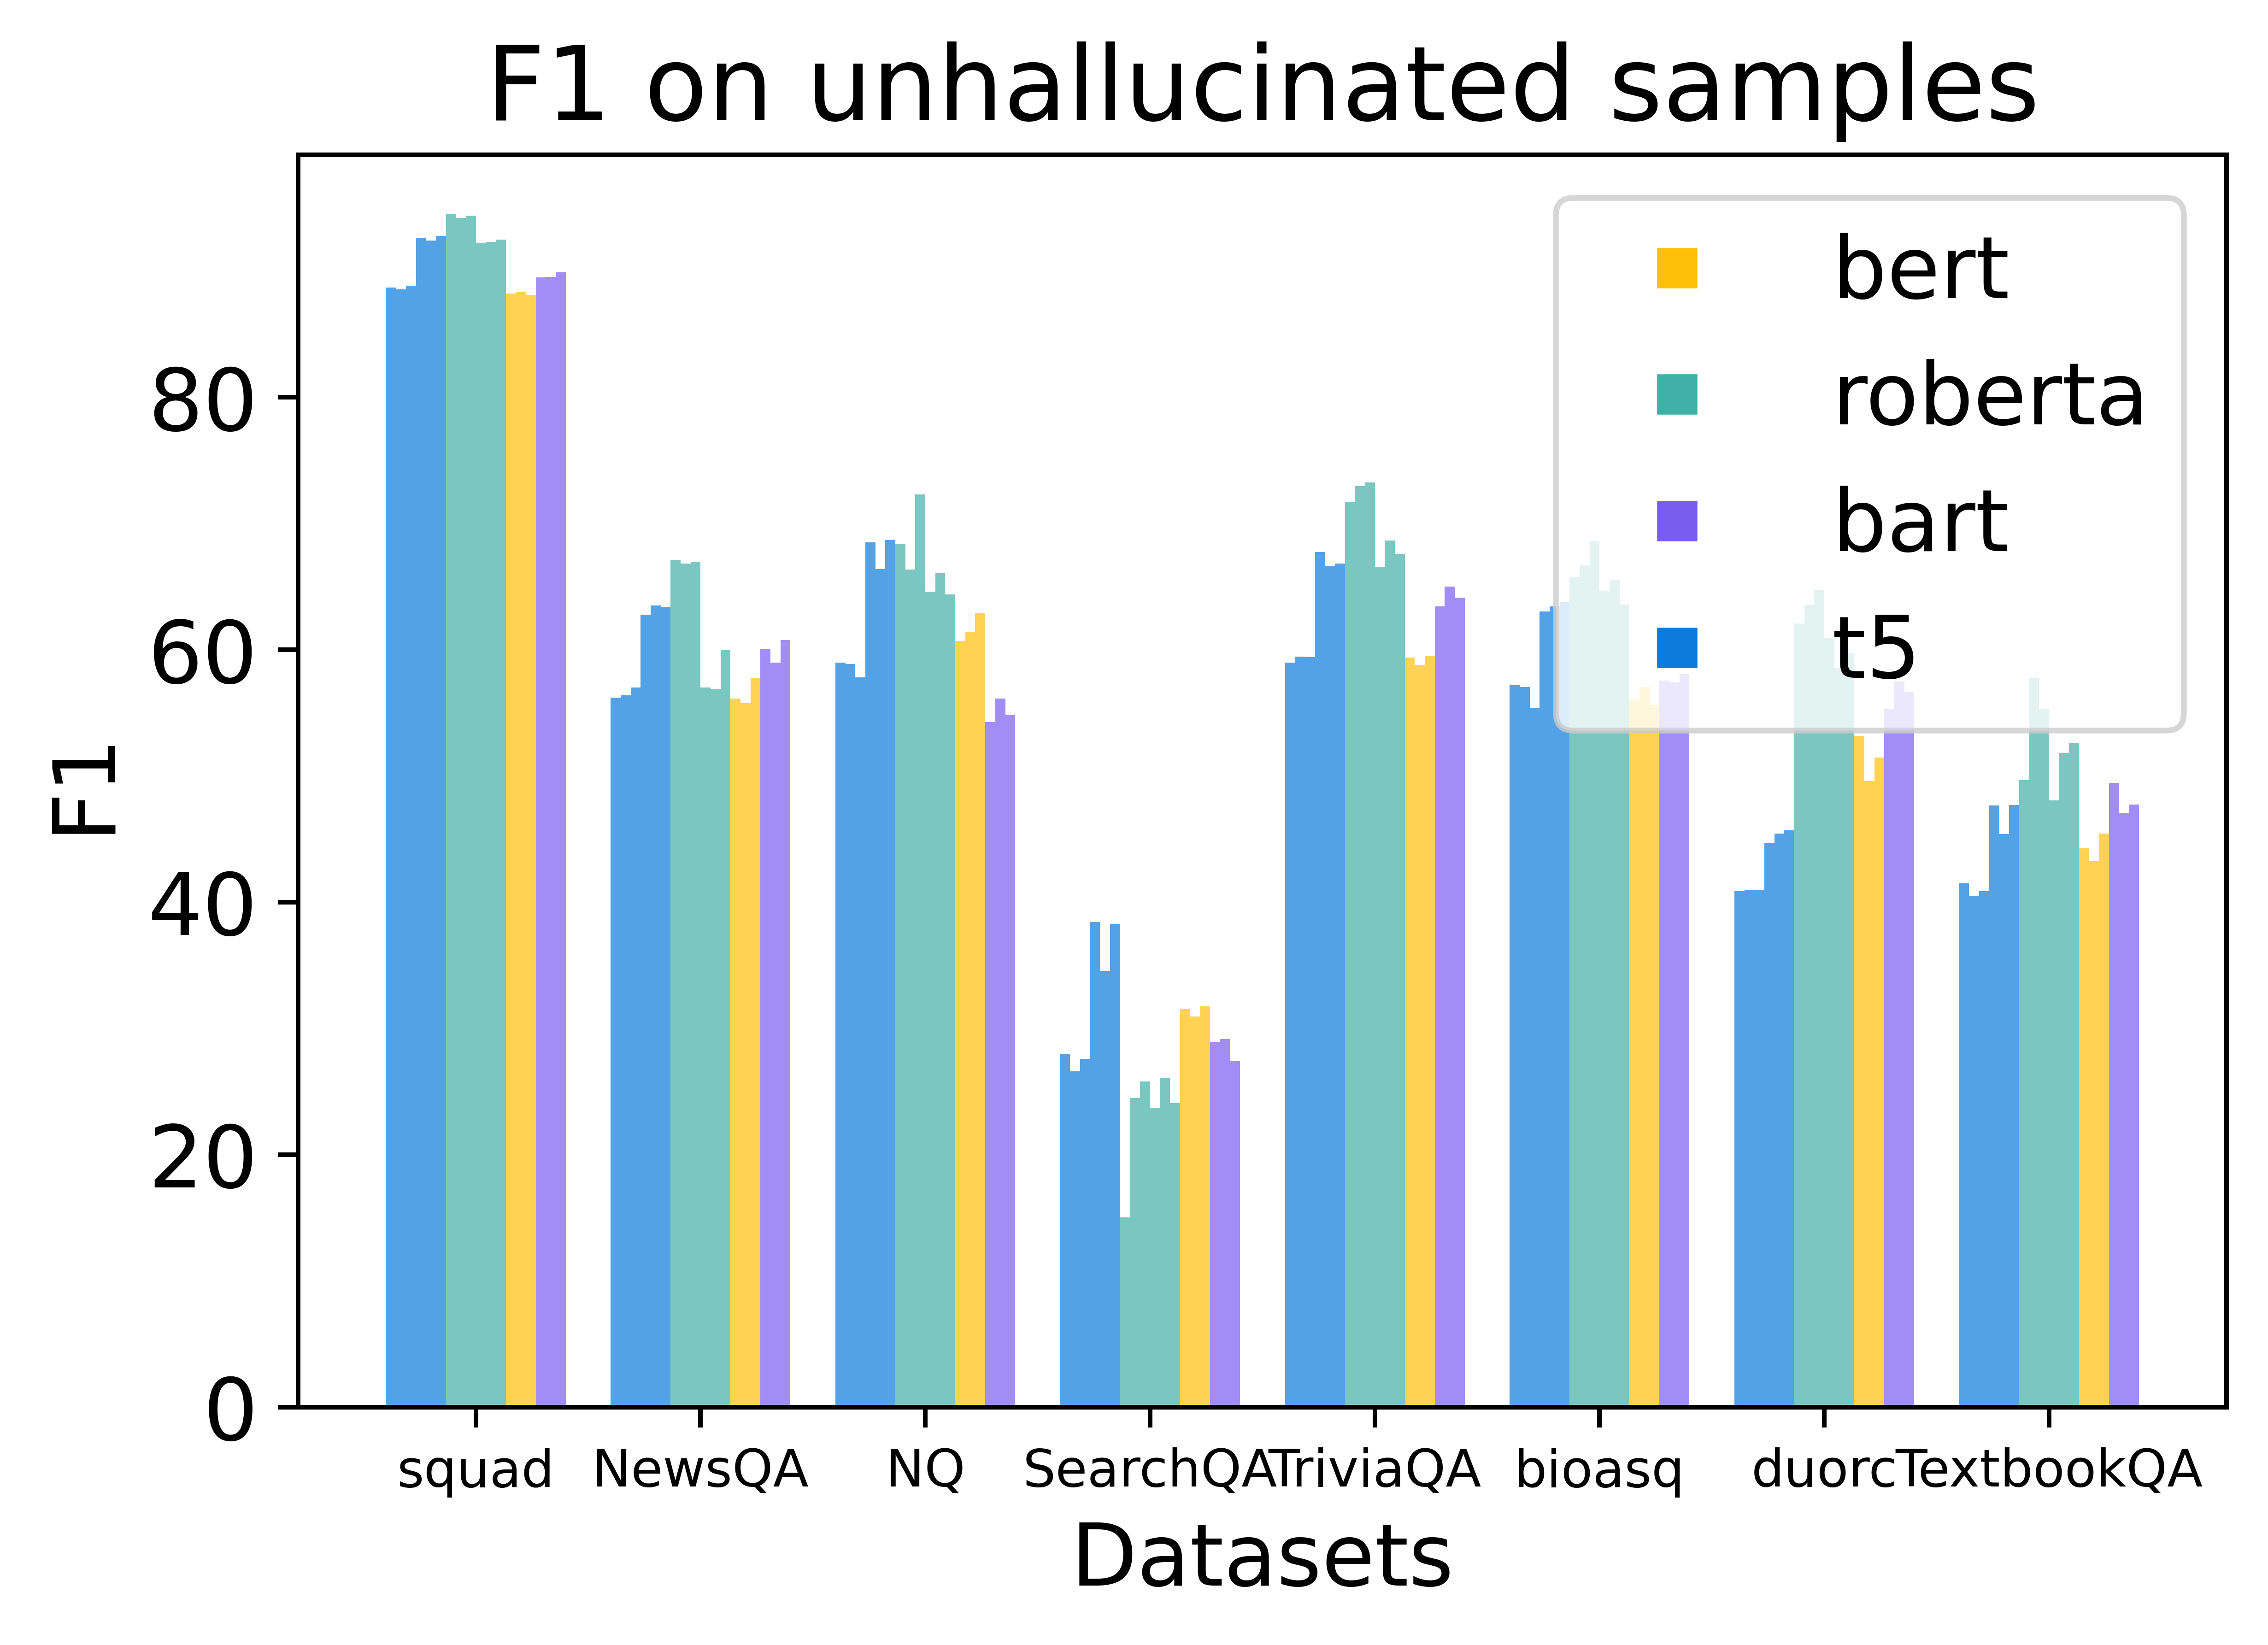

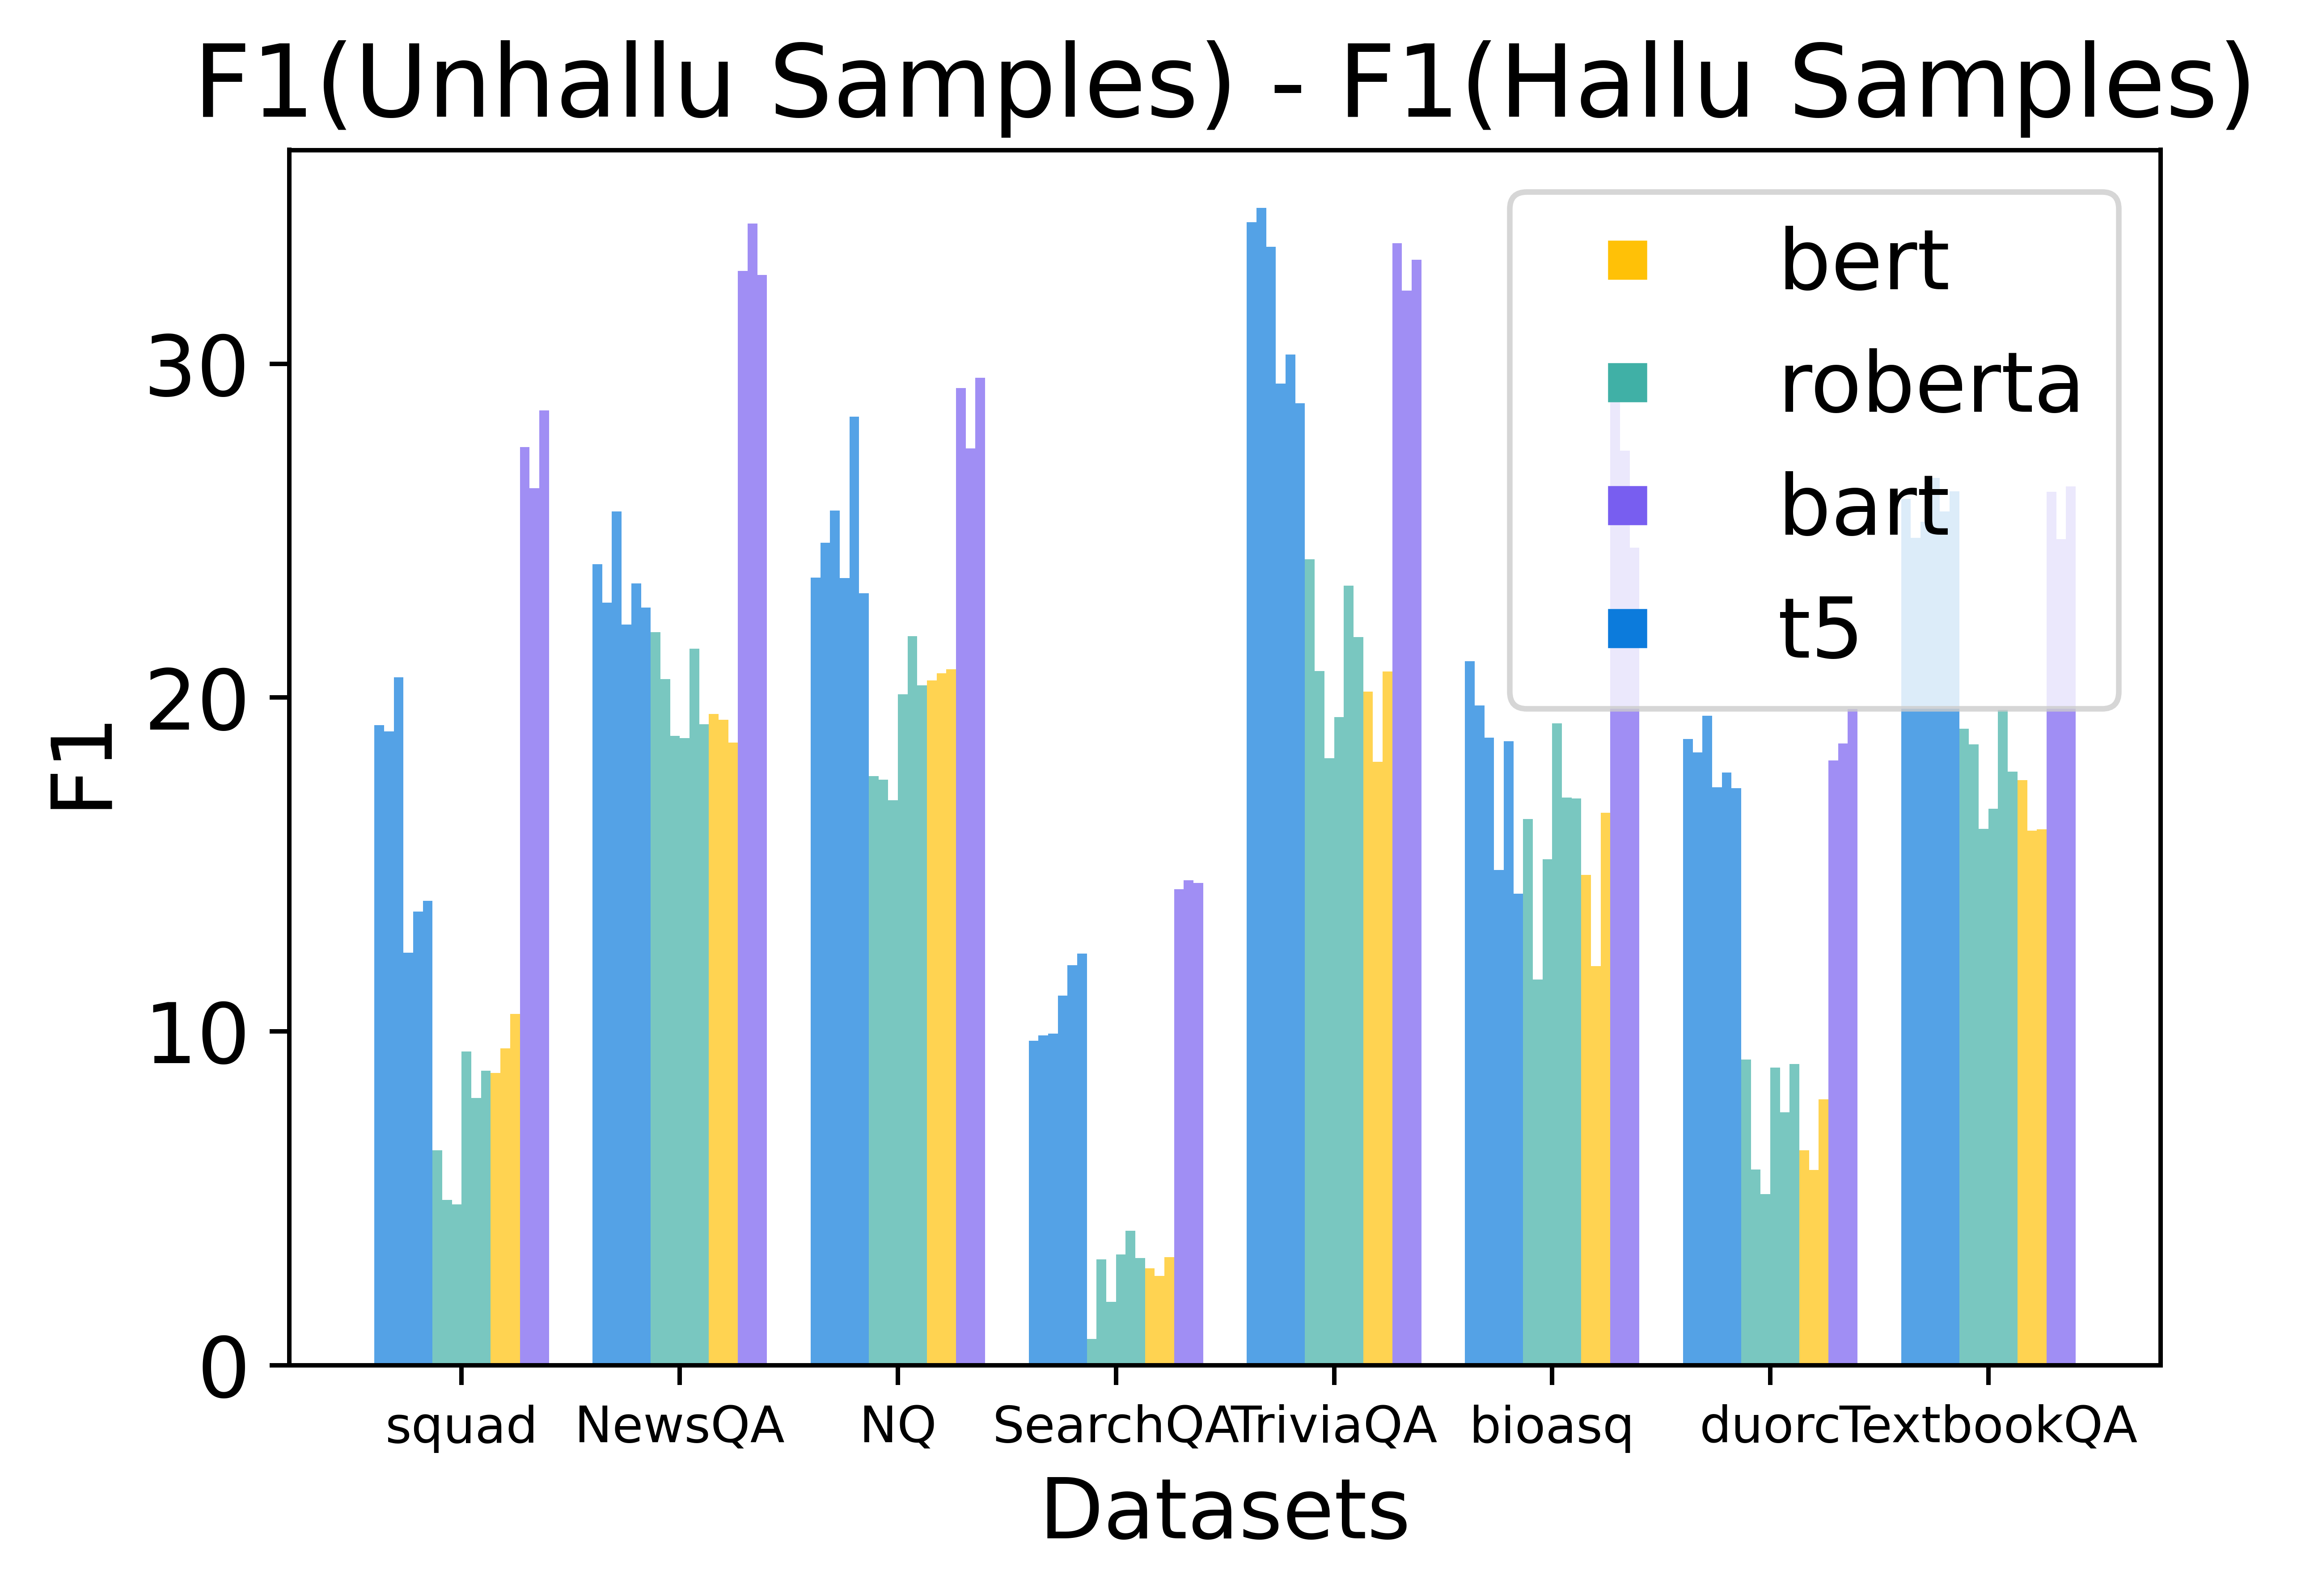

In [40]:
datasets=["squad", "NewsQA", "NaturalQuestions", "SearchQA", "TriviaQA", "bioasq", "duorc", "TextbookQA"]
plotting_utils.plot_model_wrt_datasets(f1_hallu, datasets, full_model_list, y_label_name='F1', x_label_name='Datasets', title_name='F1 on hallucinated samples')
plotting_utils.plot_model_wrt_datasets(f1_unhallu, datasets, full_model_list, y_label_name='F1', x_label_name='Datasets', title_name='F1 on unhallucinated samples')

plotting_utils.plot_model_wrt_datasets(np.array(f1_unhallu) - np.array(f1_hallu), datasets, full_model_list, y_label_name='F1', x_label_name='Datasets', title_name='F1(Unhallu Samples) - F1(Hallu Samples)')

### What is the relationship between sequence length and hallucination rate?

In [ ]:
importlib.reload(hallucination_utils)

<module 'hallucination_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post-eval-analysis/hallucination_utils.py'>

In [ ]:
model_list = ['facebook/bart-base', 'google/t5-v1_1-base', 'google/t5-v1_1-small']
display_model_list = ['bart-base', 't5-v1_1-base', 't5-v1_1-small']
dataset='bioasq'
ans_hallu, ans_lens, ans_len_counts, gen_model_list = hallucination_utils.seq_len_vs_hallucination(dataset, model_list, num_buckets=7, sequence_to_look='answers')
ans_hallu = avg_across_setup(ans_hallu, display_model_list, gen_model_list)
print(ans_hallu)
print(ans_lens)
print(ans_len_counts[1:])

que_hallu, que_lens, que_len_counts, gen_model_list = hallucination_utils.seq_len_vs_hallucination(dataset, model_list, num_buckets=10, sequence_to_look='question')
que_hallu = avg_across_setup(que_hallu, display_model_list, gen_model_list)
print(que_hallu)
print(que_lens)
print(que_len_counts[1:])

con_hallu, con_lens, con_len_counts, gen_model_list = hallucination_utils.seq_len_vs_hallucination(dataset, model_list, num_buckets=12, sequence_to_look='context')
con_hallu = avg_across_setup(con_hallu, display_model_list, gen_model_list)
print(con_hallu)
print(con_lens)
print(con_len_counts[1:])

Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 600.13it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bart-base': array([0.0369573 , 0.0399137 , 0.06944444, 0.06896552, 0.1037037 ]), 't5-v1_1-base': array([0.00897022, 0.00755124, 0.00173611, 0.02298851, 0.01481481]), 't5-v1_1-small': array([0.01004665, 0.01618123, 0.00694444, 0.        , 0.00740741])}
[1.0, 2.0, 3.0, 4.0, 38.0]
[929, 309, 0, 0, 192, 0, 29, 45]


Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 615.09it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bart-base': array([0.07330567, 0.04081633, 0.05882353, 0.04365079, 0.02882883,
       0.01226994, 0.04938272, 0.03231293, 0.07801418]), 't5-v1_1-base': array([0.00829876, 0.00680272, 0.00588235, 0.01851852, 0.00720721,
       0.        , 0.00617284, 0.00510204, 0.0141844 ]), 't5-v1_1-small': array([0.01106501, 0.        , 0.00784314, 0.02248677, 0.01081081,
       0.00613497, 0.00617284, 0.01360544, 0.0070922 ])}
[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 18.0, 27.0]
[241, 196, 0, 170, 252, 0, 185, 163, 54, 196, 47]


Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 687.82it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bart-base': array([0.04724409, 0.07874016, 0.03003003, 0.03448276, 0.01179941,
       0.03703704, 0.03363914, 0.04385965, 0.04392765, 0.04126984,
       0.05246914, 0.05217391, 0.06489676]), 't5-v1_1-base': array([0.00262467, 0.00262467, 0.00900901, 0.        , 0.02064897,
       0.002849  , 0.01529052, 0.01461988, 0.00775194, 0.0031746 ,
       0.00617284, 0.0115942 , 0.01179941]), 't5-v1_1-small': array([0.00787402, 0.00787402, 0.00600601, 0.00862069, 0.01474926,
       0.00854701, 0.01529052, 0.01461988, 0.01033592, 0.01587302,
       0.00308642, 0.01449275, 0.01179941])}
[108.0, 140.0, 158.36363636363637, 179.0, 194.0, 202.0, 214.81818181818176, 229.68181818181813, 243.0, 252.0, 267.27272727272725, 300.0, 639.0]
[127, 127, 111, 116, 113, 117, 109, 114, 129, 105, 108, 115, 113]


<Figure size 5400x3600 with 0 Axes>

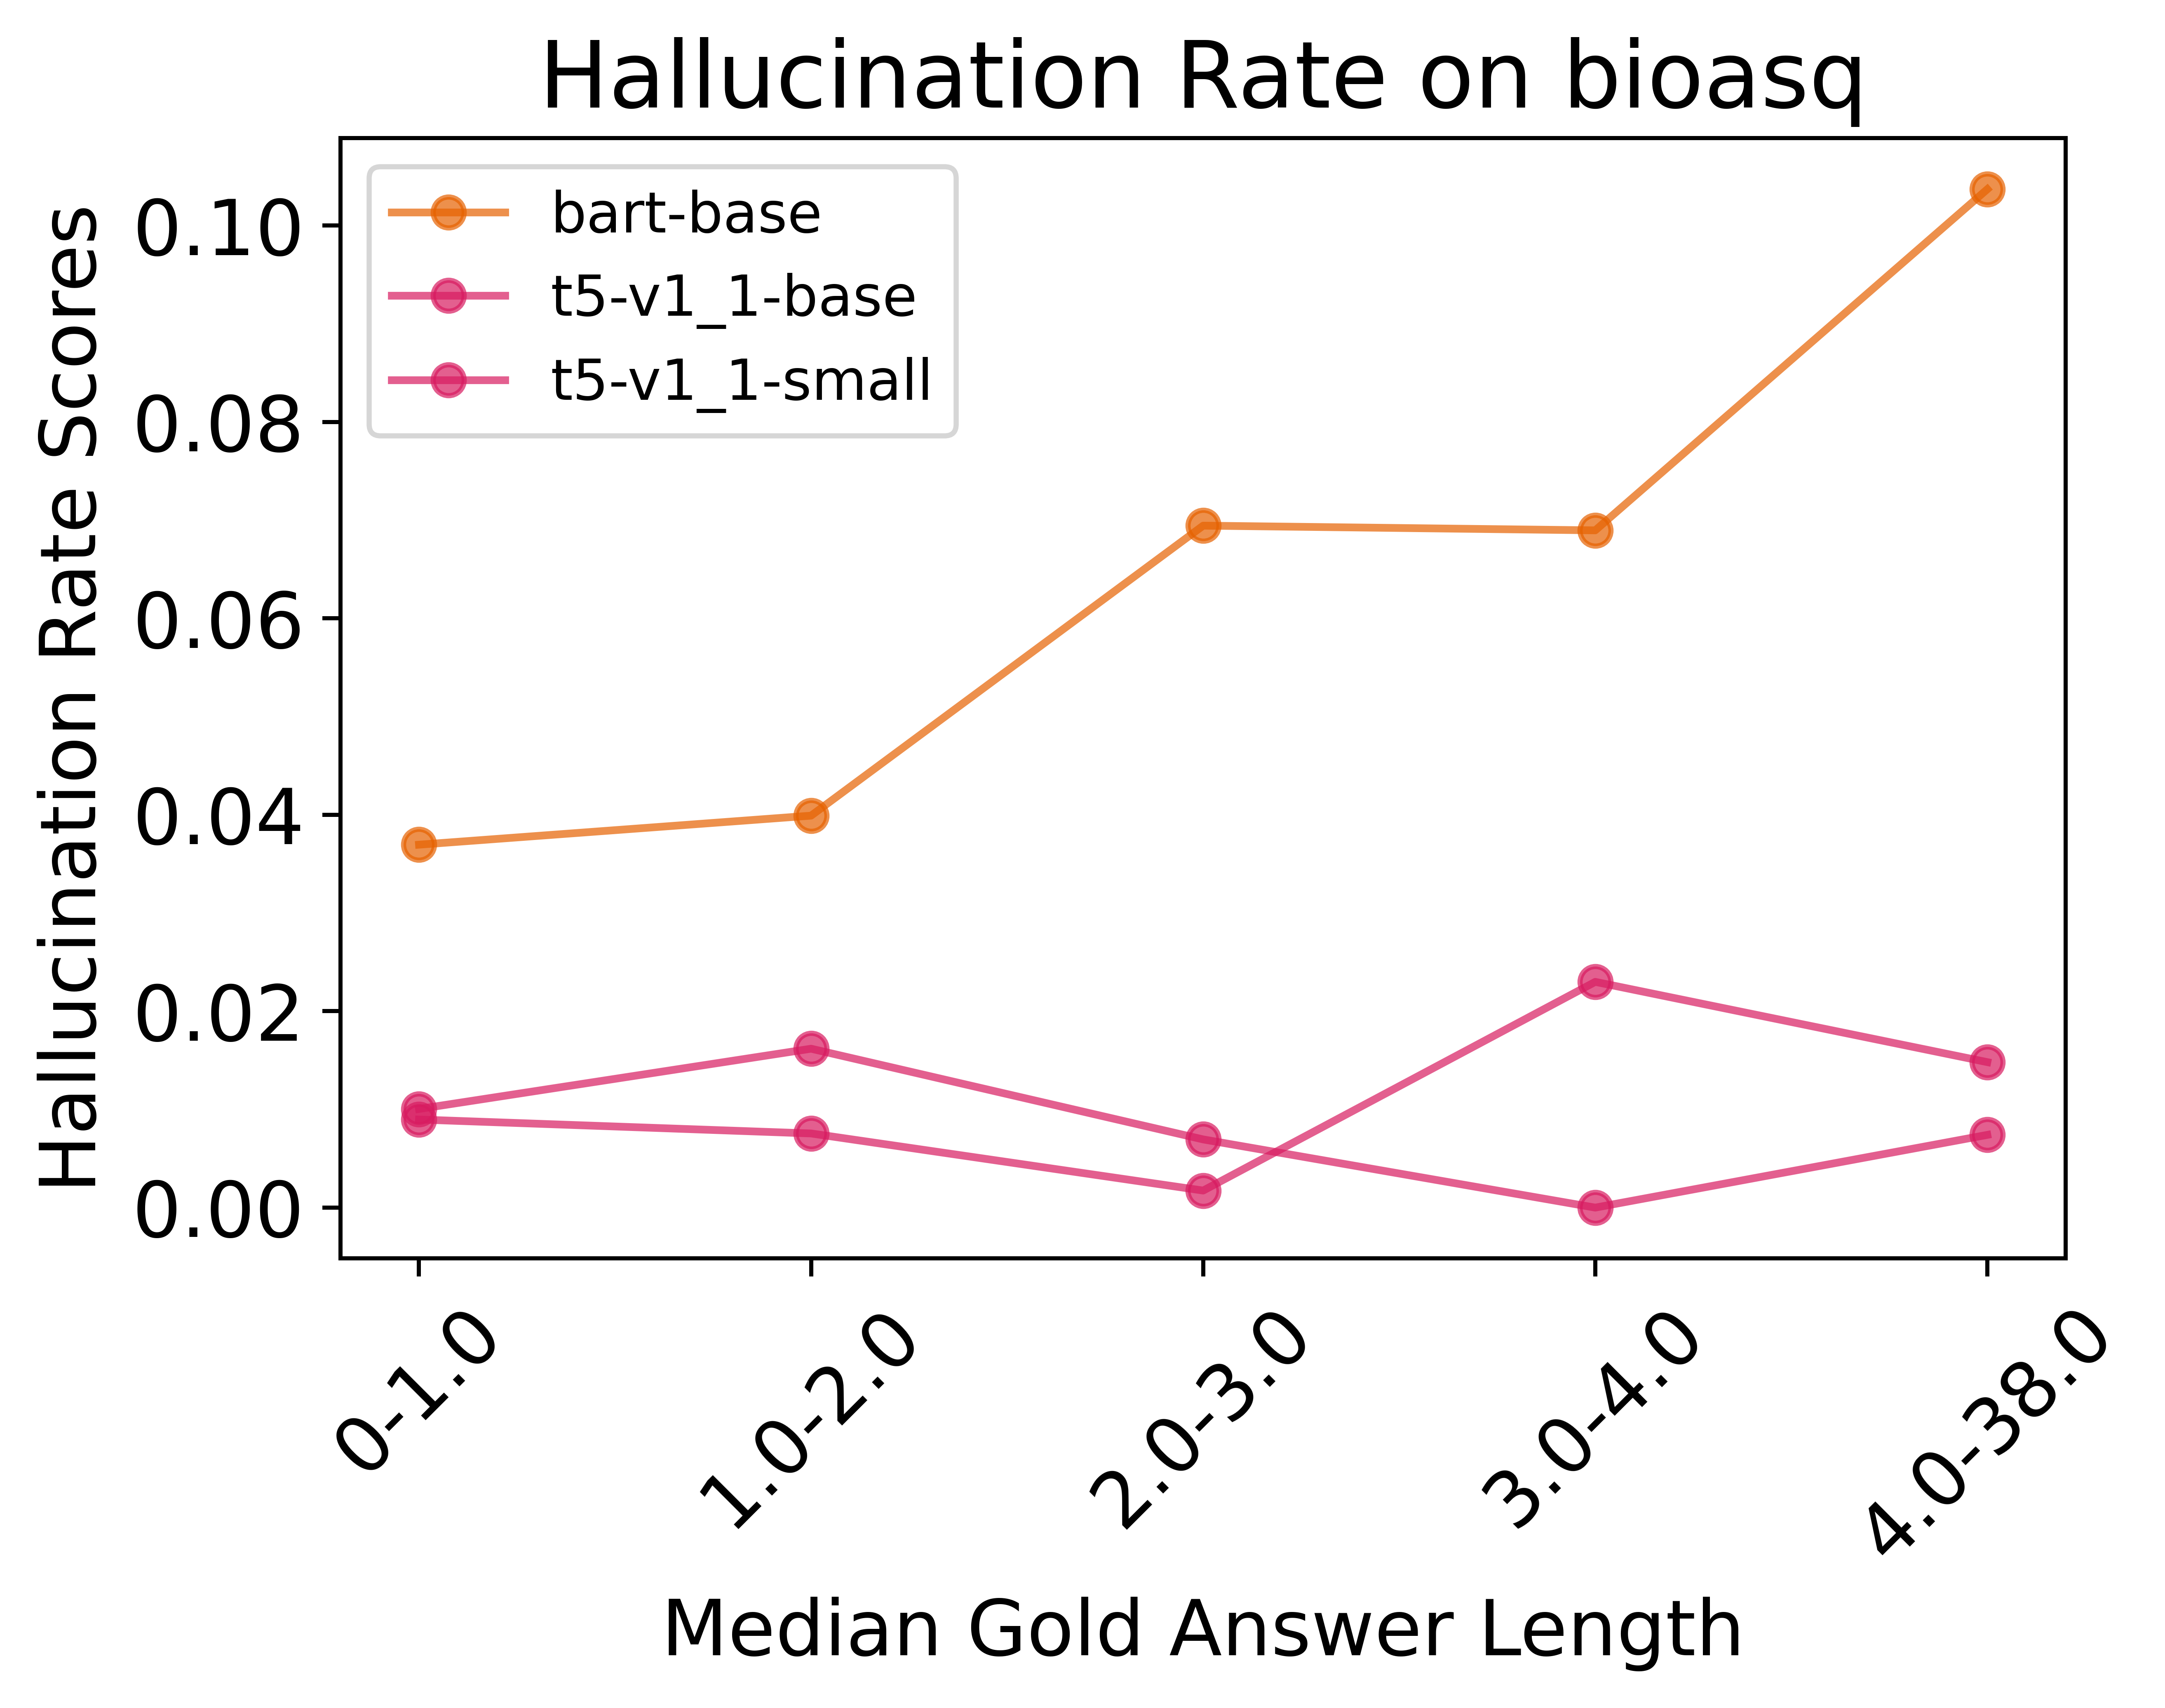

<Figure size 5400x3600 with 0 Axes>

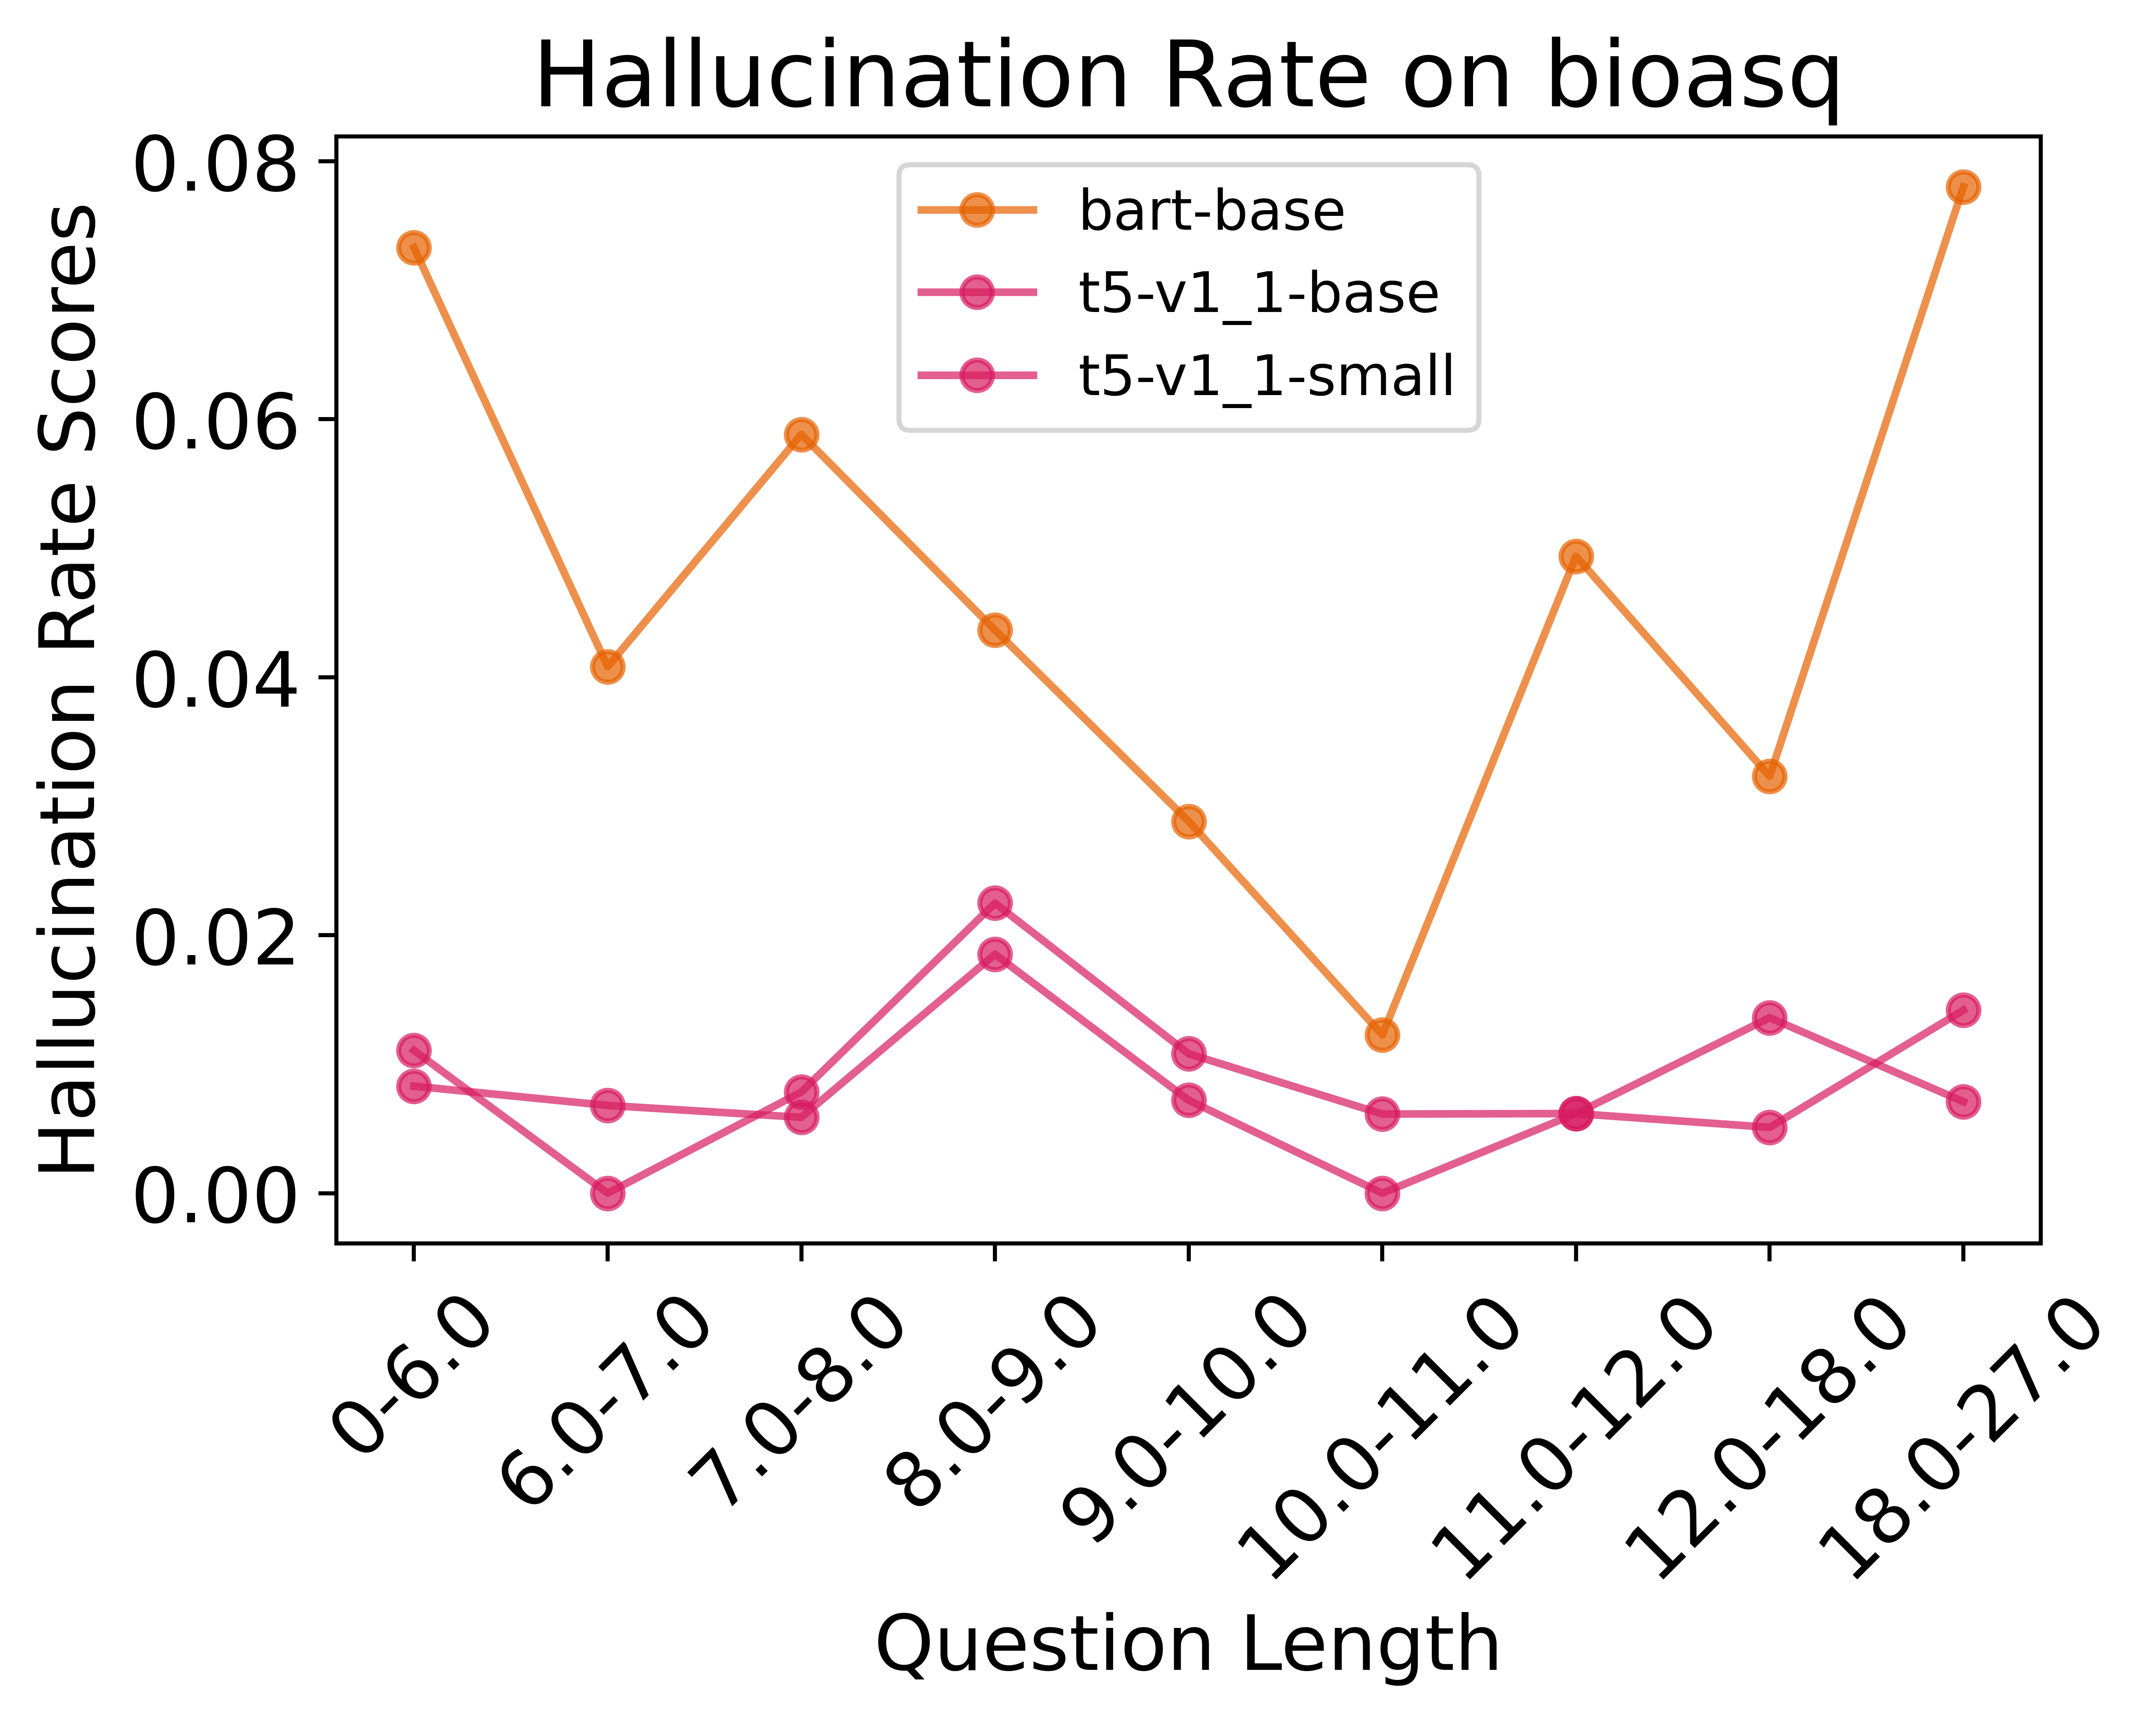

<Figure size 5400x3600 with 0 Axes>

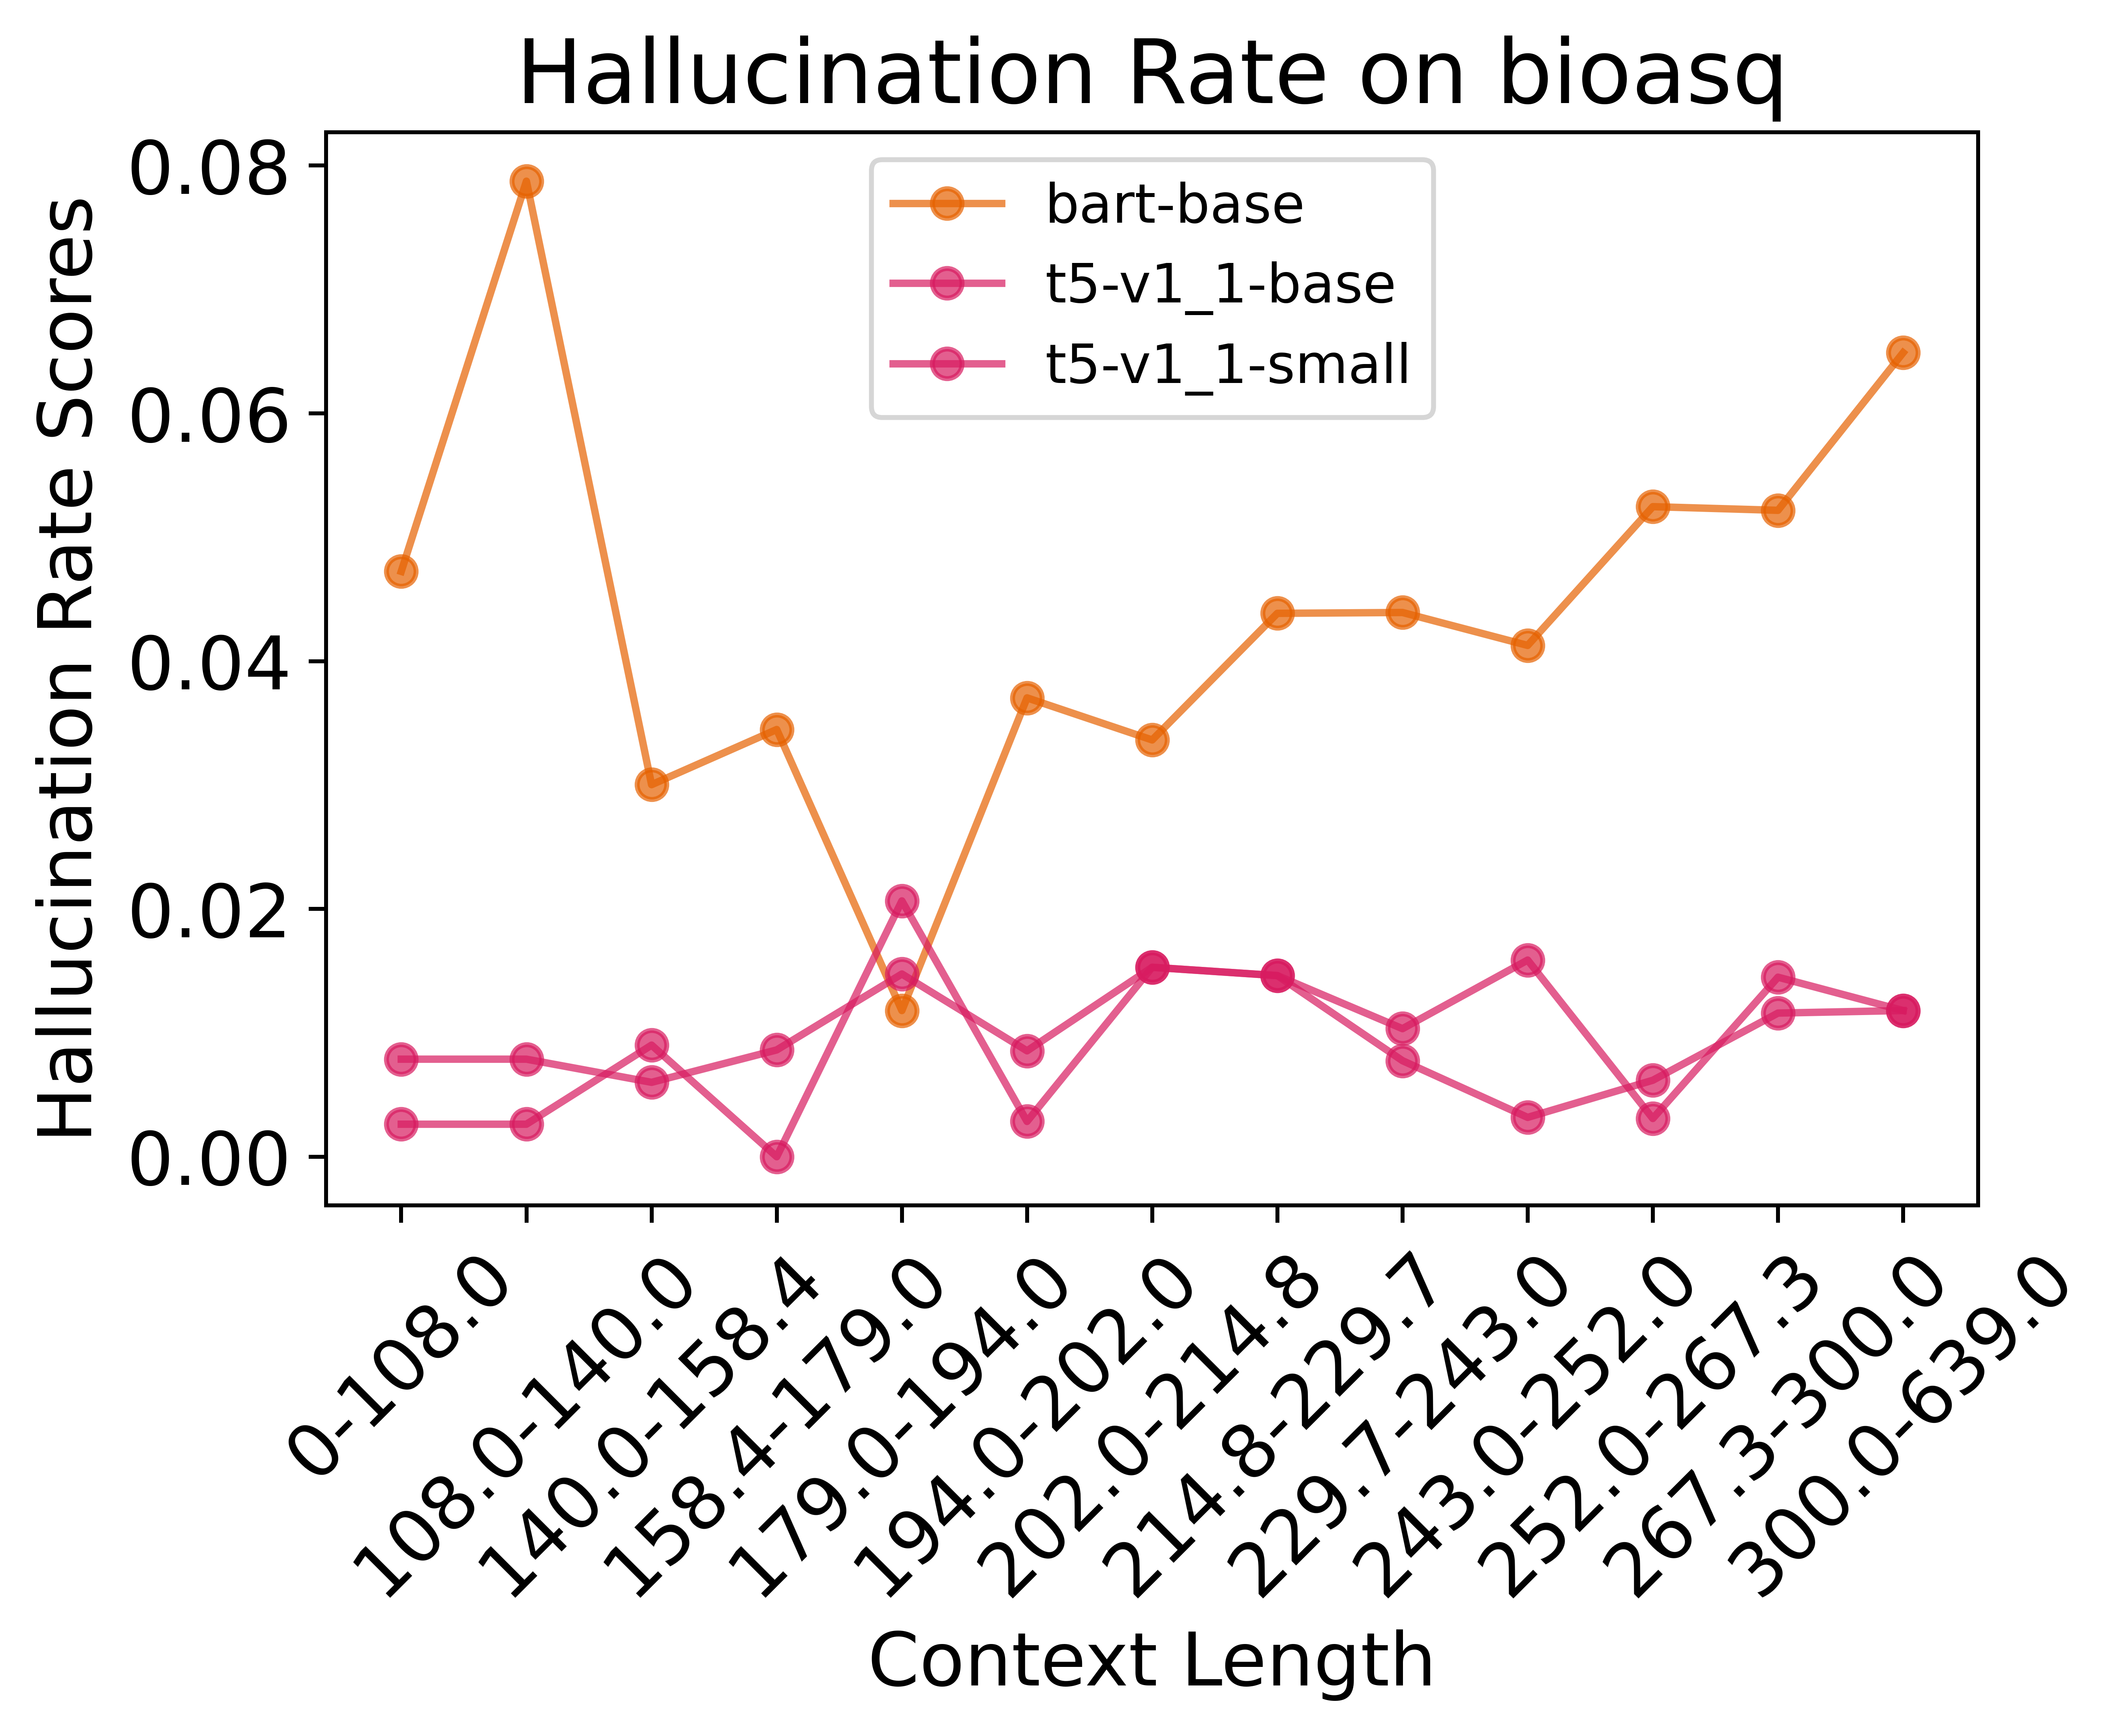

In [ ]:
plotting_utils.plot_perf_wrt_seq(ans_hallu, ans_lens, 'Median Gold Answer Length', display_model_list, "Hallucination Rate", dataset)
plotting_utils.plot_perf_wrt_seq(que_hallu, que_lens, 'Question Length', display_model_list, "Hallucination Rate", dataset)
plotting_utils.plot_perf_wrt_seq(con_hallu, con_lens, 'Context Length', display_model_list, "Hallucination Rate", dataset)

### What is the relationship between question-context overlap v.s. hallucination rate?

In [21]:
model_list = ['facebook/bart-base', 'facebook/bart-base-tokenizer', 'google/t5-v1_1-base', 'google/t5-v1_1-small']
display_model_list = ['bart-base', 'bart-base-tokenizer', 't5-v1_1-base', 't5-v1_1-small']
dataset='bioasq'
n_gram = 2
hallu, overlap_rates, overlap_counts, gen_model_list = hallucination_utils.qc_overlap_vs_hallucination(dataset, model_list, num_buckets=5, n_gram=n_gram)
hallu = avg_across_setup(hallu, display_model_list, gen_model_list)
print(hallu)
print(overlap_rates)
print(overlap_counts)

Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 621.84it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


{'bart-base': array([0.04084381, 0.03358209, 0.02840909, 0.02745665, 0.02462121,
       0.01815642]), 'bart-base-tokenizer': array([0.01885099, 0.01492537, 0.01704545, 0.01445087, 0.        ,
       0.0027933 ]), 't5-v1_1-base': array([0.01077199, 0.00746269, 0.01136364, 0.00289017, 0.        ,
       0.01675978]), 't5-v1_1-small': array([0.00807899, 0.01492537, 0.01325758, 0.00578035, 0.00189394,
       0.01675978])}
[0.0, 0.09090909090909091, 0.14285714285714285, 0.2, 0.3333333333333333, 1.0]
[0, 557, 67, 264, 173, 264, 179]


<Figure size 432x288 with 0 Axes>

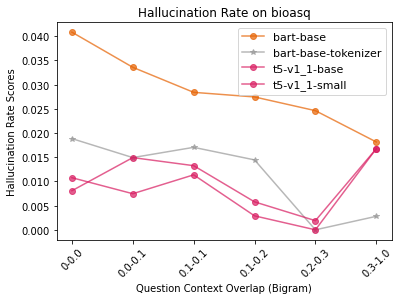

In [25]:
num_grams= 'Unigram' if n_gram == 1 else 'Bigram'
plotting_utils.plot_perf_wrt_seq(hallu, overlap_rates, 'Question Context Overlap (' + num_grams + ')', display_model_list, metric_name="Hallucination Rate", dataset=dataset)

In [35]:
model_list = ['facebook/bart-base', 'google/t5-v1_1-base', 'google/t5-v1_1-small', 'roberta-base', 'roberta-large', 'bert-base-uncased']
display_model_list = ['bart-base', 't5-v1_1-base', 't5-v1_1-small', 'roberta-base', 'roberta-large', 'bert-base']
dataset='bioasq'
n_gram = 2

metric_name = 'F1'
metric_fn = f1_score if metric_name == 'F1' else exact_match_score
perfs, overlap_rates, overlap_rate_counts, model_list = analysis_utils.qc_overlap_vs_perf(dataset, model_list, num_buckets=5, metric_fn=metric_fn, n_gram=n_gram)
perfs = avg_across_setup(perfs, display_model_list, model_list)

Using custom data configuration default-4db68f511a477386
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 619.09it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-4db68f511a477386/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-0321b25494e20793.arrow


<Figure size 5400x3600 with 0 Axes>

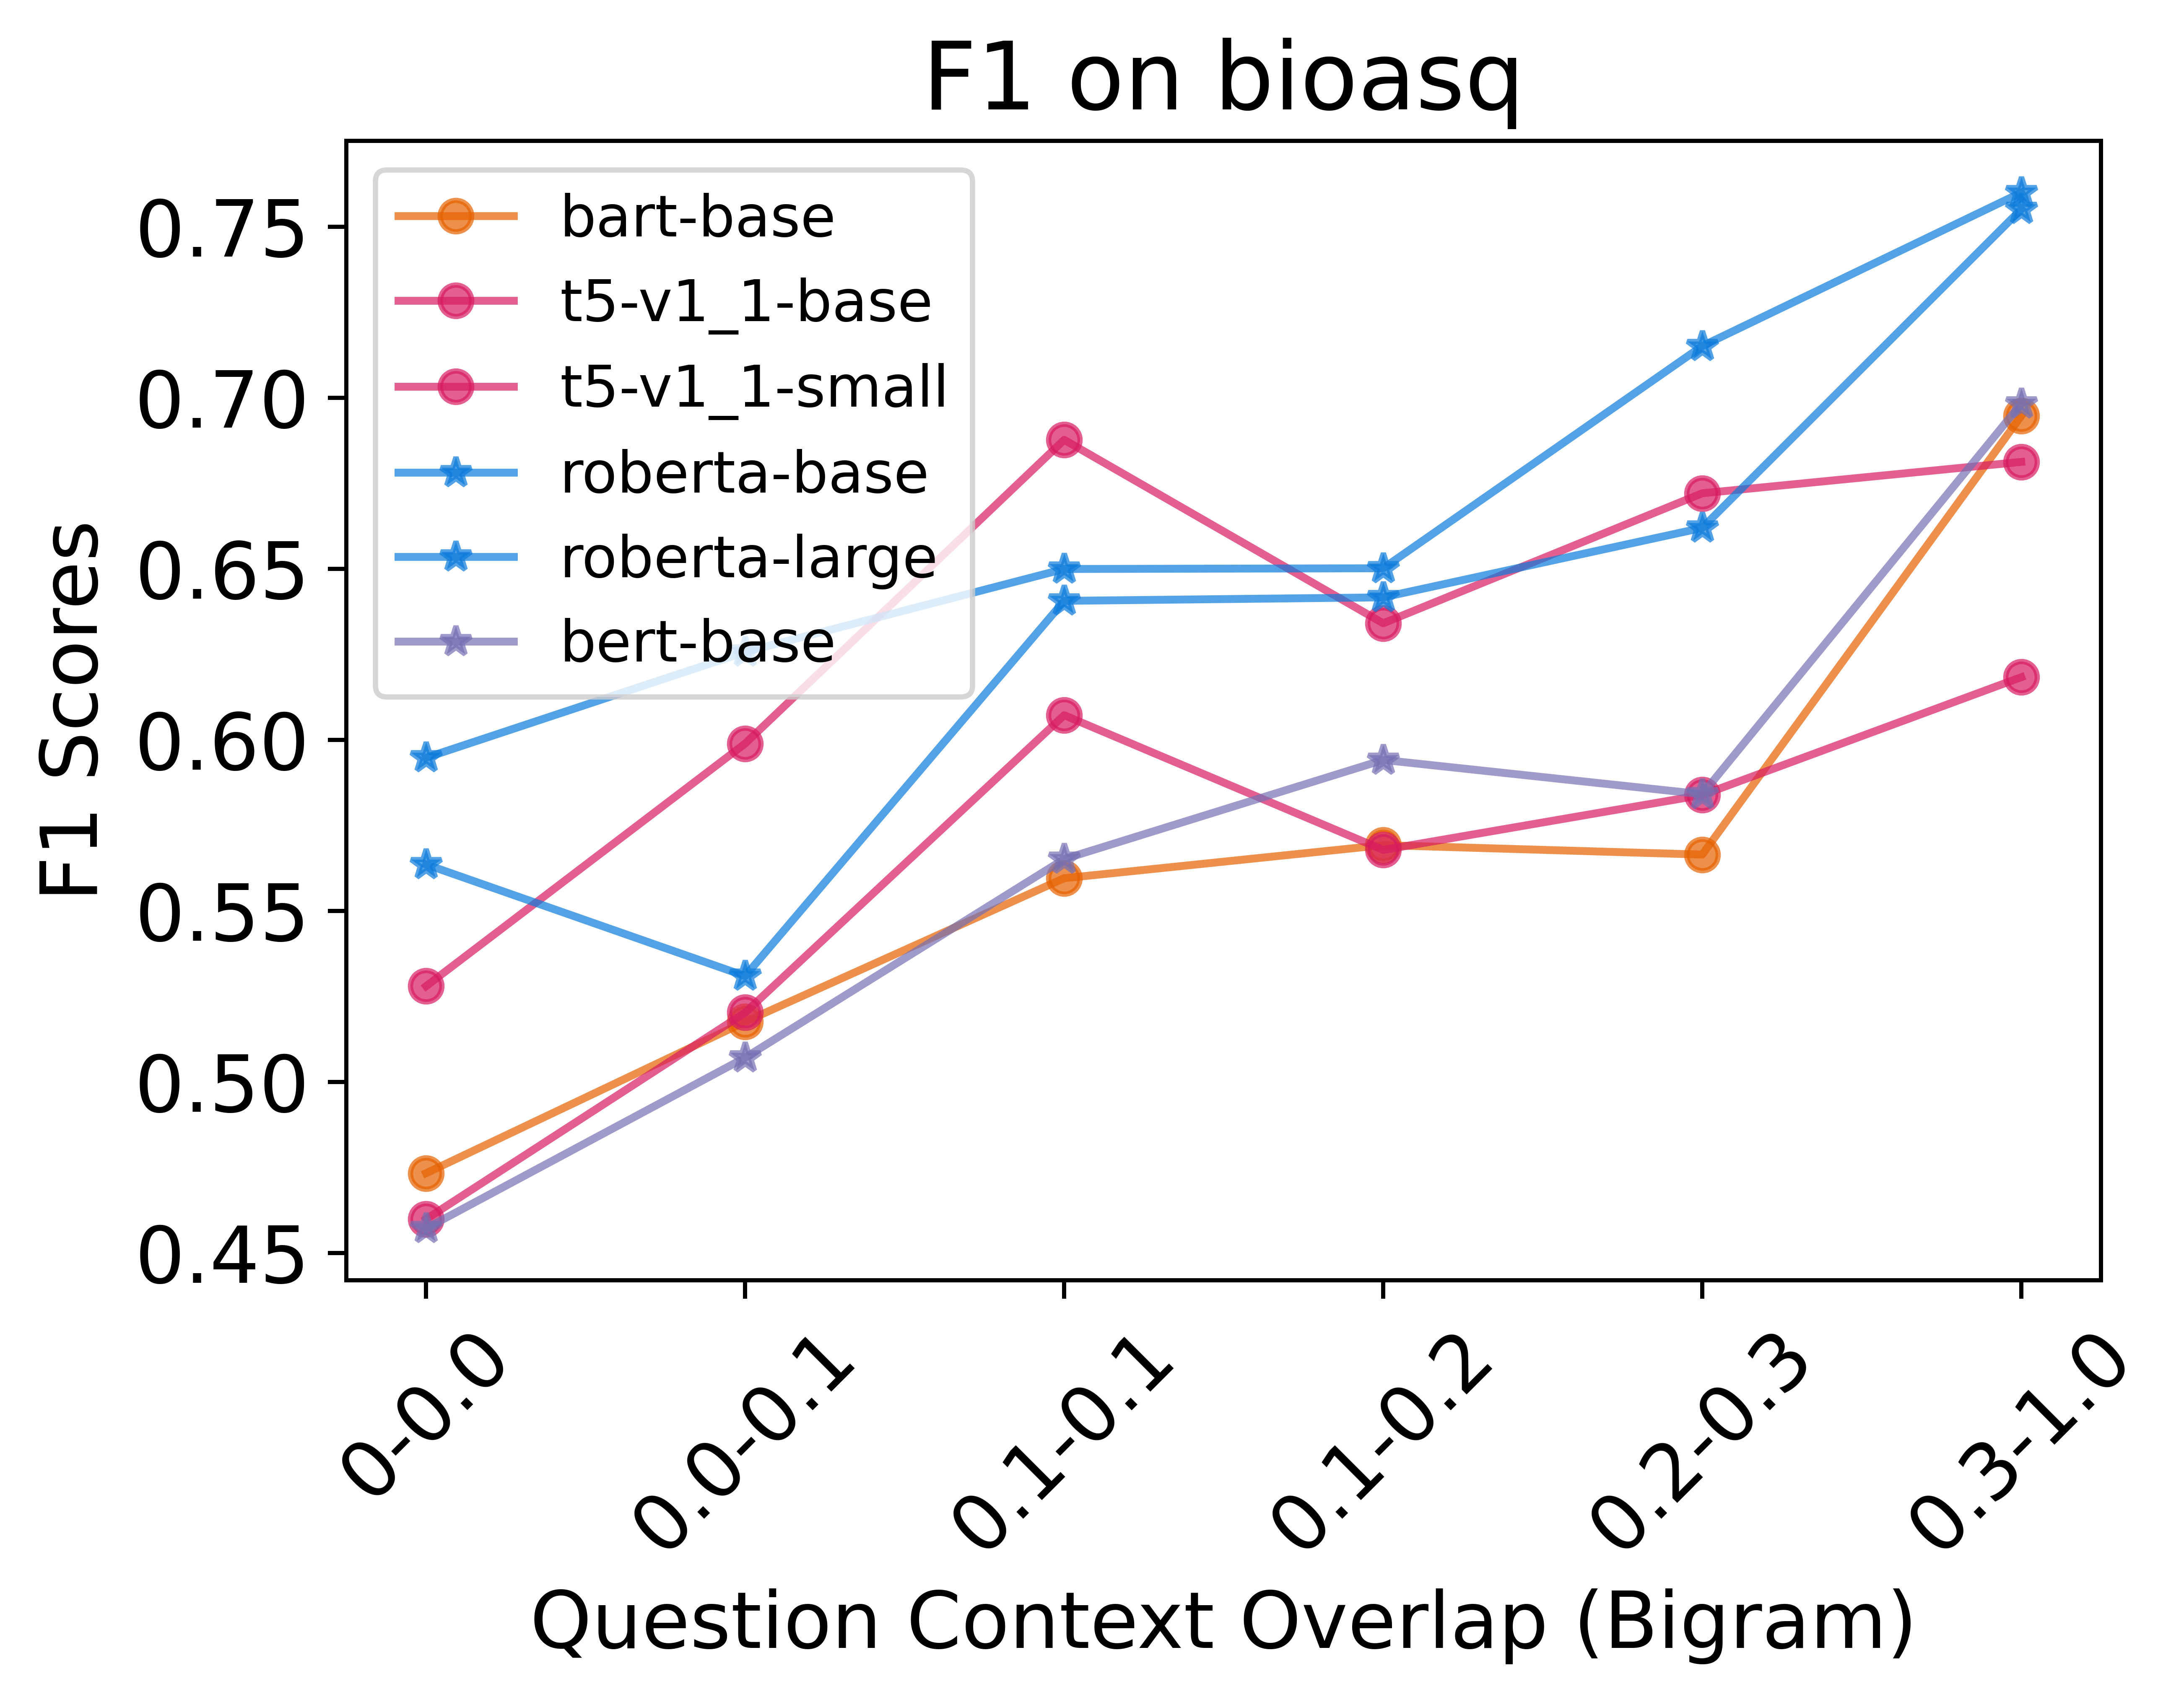

In [36]:
num_grams= 'Unigram' if n_gram == 1 else 'Bigram'
plotting_utils.plot_perf_wrt_seq(perfs, overlap_rates, 'Question Context Overlap (' + num_grams + ')', display_model_list, metric_name=metric_name, dataset=dataset)

#### Performance v.s. Dataset Creation Strategy?

In [14]:
importlib.reload(analysis_utils)
importlib.reload(plotting_utils)

<module 'plotting_utils' from '/home/ec2-user/efs/users/huikans/QA-code-base/post-eval-analysis/plotting_utils.py'>

In [25]:
group1 = ['bert-base-uncased', 'roberta-base', 'roberta-large']
group2 =['facebook/bart-base', 'google/t5-v1_1-base', 'google/t5-v1_1-small']
model_list = ['bert-base-uncased', 'roberta-base', 'roberta-large', 'facebook/bart-base', 'google/t5-v1_1-base', 'google/t5-v1_1-small']

strategy_v_f1, strategy_v_em, group1, group2, creation_strategies = analysis_utils.perf_wrt_group_type(model_list, group1, group2, grouping_type='strategy', base_dataset='squad')

Using custom data configuration default-0ad243275be14d83
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-0ad243275be14d83/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 637.82it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-0ad243275be14d83/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-3f89a7eb749d6bd0.arrow
Using custom data configuration default-5035765bd867d66f
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 791.38it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-068980baab229c05.arrow
Using custom data configuration default-383b6e

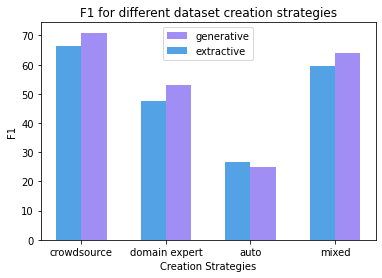

[[58.93447137 41.16321177 18.0159665  54.89045886]
 [54.93415015 37.67874958 20.12432928 51.87754228]]


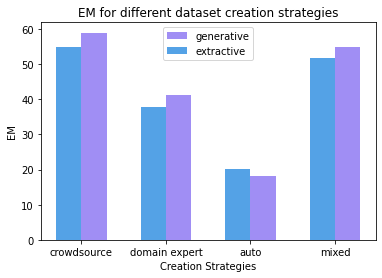

In [ ]:
plotting_utils.bar_plot(strategy_v_f1, creation_strategies, ['generative', 'extractive'], ylabel = 'F1', xlabel='Creation Strategies', title='F1 for different dataset creation strategies')
plotting_utils.bar_plot(strategy_v_em, creation_strategies, ['generative', 'extractive'], ylabel = 'EM', xlabel='Creation Strategies', title='EM for different dataset creation strategies')

In [4]:
group1 = ['bert-base-uncased', 'roberta-base', 'roberta-large']
group2 =['facebook/bart-base', 'google/t5-v1_1-base', 'google/t5-v1_1-small']
model_list = ['bert-base-uncased', 'roberta-base', 'roberta-large', 'facebook/bart-base', 'google/t5-v1_1-base', 'google/t5-v1_1-small']

domain_v_f1, domain_v_em, group1, group2, domains = analysis_utils.perf_wrt_group_type(model_list, group1, group2, grouping_type='domain', base_dataset='squad')

Using custom data configuration default-0ad243275be14d83
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-0ad243275be14d83/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 542.18it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-0ad243275be14d83/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-3f89a7eb749d6bd0.arrow
Using custom data configuration default-5035765bd867d66f
Reusing dataset csv (/home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)
100%|██████████| 1/1 [00:00<00:00, 488.56it/s]
Loading cached processed dataset at /home/ec2-user/.cache/huggingface/datasets/csv/default-5035765bd867d66f/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-068980baab229c05.arrow
Using custom data configuration default-1a0b73

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


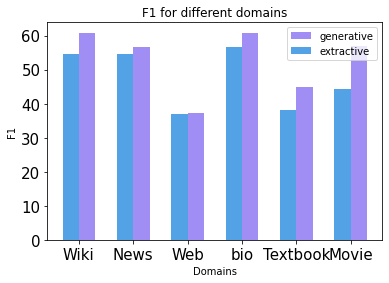

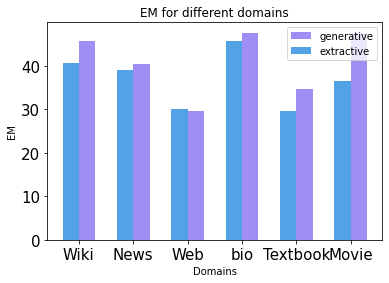

In [5]:
plotting_utils.bar_plot(domain_v_f1, domains, ['generative', 'extractive'], ylabel = 'F1', xlabel='Domains', title='F1 for different domains')
plotting_utils.bar_plot(domain_v_em, domains, ['generative', 'extractive'], ylabel = 'EM', xlabel='Domains', title='EM for different domains')